# Modal organization in Chinese Folks songs
-----------
## Digital Musicology - Milestone 3
-------

In [1]:
# Imports 

from music21 import *
import glob
from tqdm import tqdm
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter
import networkx as nx
import math
import numpy as np
from copy import deepcopy

In [2]:
def string_to_float_list(string_list):
    try:
        return [float(x) for x in string_list.replace("[", "").replace("]", "").replace(" ","").split(",")]
    except:
        return None

In [3]:
CFS_full = pd.read_csv("./data/dataframes/cfs_full.csv", converters={'pitches': eval,'pitchclasses': eval, 'intervals':eval, 'pitches_transposed': eval,'pitchclasses_transposed': eval,'top5_after_transpose': eval})
CFS_full.beat_strengths = CFS_full.beat_strengths.apply(string_to_float_list)
CFS_full.durations = CFS_full.durations.apply(string_to_float_list)
CFS_full = CFS_full[~ ((CFS_full.pitches.isna()) | (CFS_full.durations.isna()) | (CFS_full.beat_strengths.isna()))]
CFS_full.head()

,region,title,location,tonic,length,unq_pitchclass_count,pitches,pitchclasses,durations,beat_strengths,intervals,pitches_transposed,pitchclasses_transposed,top5_after_transpose,mode,geo_division
0,han,Renmin gongshe shizai hao,"Asia, China, Shanxi, Zizhou",D,64,6,"[D5, A4, C5, D5, D5, A4, C5, D5, G5, C5, A4, G...","[D, A, C, D, D, A, C, D, G, C, A, G, A, C, D, ...","[1.0, 0.5, 0.5, 1.0, 1.0, 0.75, 0.25, 0.5, 0.5...","[1.0, 0.5, 0.25, 1.0, 0.5, 1.0, 0.125, 0.5, 0....","[P4, m3, M2, P1, P4, m3, M2, P4, P5, m3, M2, M...","[C5, G4, B-4, C5, C5, G4, B-4, C5, F5, B-4, G4...","[C, G, B-, C, C, G, B-, C, F, B-, G, F, G, B-,...","[C, B-, F, G, D]",shang,Northwest
1,han,Zanmen de ling xiu Mao Zedong,"Asia, China, Shanxi Nordwesten",C,57,7,"[C5, C5, F5, C5, B-4, G4, C5, E-4, F4, G4, C5,...","[C, C, F, C, B-, G, C, E-, F, G, C, C, F, C, B...","[1.0, 1.0, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[1.0, 0.5, 1.0, 0.25, 0.25, 1.0, 0.25, 0.5, 0....","[P1, P4, P4, M2, m3, P4, M6, M2, M2, P4, P1, P...","[C5, C5, F5, C5, B-4, G4, C5, E-4, F4, G4, C5,...","[C, C, F, C, B-, G, C, E-, F, G, C, C, F, C, B...","[C, G, F, E-, D]",NaN,Northwest
2,han,Tian xin shun,"Asia, China, Shanxi Yanchang",D,24,5,"[D5, A4, D5, D5, A4, D5, A4, D5, G4, E4, D4, D...","[D, A, D, D, A, D, A, D, G, E, D, D, D, G, G, ...","[1.0, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 1.0, 0.5, ...","[1.0, 0.5, 1.0, 0.25, 0.5, 1.0, 0.25, 0.5, 1.0...","[P4, P4, P1, P4, P4, P4, P4, P5, m3, M2, P1, P...","[C5, G4, C5, C5, G4, C5, G4, C5, F4, D4, C4, C...","[C, G, C, C, G, C, G, C, F, D, C, C, C, F, F, ...","[C, G, F, D, A]",zhi,Northwest
3,han,Liu zhi dan,"Asia, China, Shanxi Shanbei",B-,41,5,"[E-5, C5, B-4, A-4, B-4, E-4, F4, E-5, C5, B-4...","[E-, C, B-, A-, B-, E-, F, E-, C, B-, A-, A-, ...","[0.75, 0.25, 0.5, 0.5, 0.5, 0.5, 1.0, 0.75, 0....","[1.0, 0.125, 0.5, 0.25, 1.0, 0.25, 0.5, 1.0, 0...","[m3, M2, M2, M2, P5, M2, m7, m3, M2, M2, P1, M...","[F4, D4, C4, B-3, C4, F3, G3, F4, D4, C4, B-3,...","[F, D, C, B-, C, F, G, F, D, C, B-, B-, C, F, ...","[C, F, G, B-, D]",shang,Northwest
4,han,Zanmen de hongjun shi li zhong,"Asia, China, Shanxi Shanbei",E,24,5,"[E5, E4, A4, G4, A4, B4, E5, D5, E5, B4, E5, E...","[E, E, A, G, A, B, E, D, E, B, E, E, A, G, A, ...","[1.0, 1.0, 0.5, 0.25, 0.25, 1.0, 1.0, 0.5, 0.5...","[1.0, 0.5, 1.0, 0.25, 0.125, 0.5, 1.0, 0.5, 0....","[P1, P4, M2, M2, M2, P4, M2, M2, P4, P4, P1, P...","[C5, C4, F4, E-4, F4, G4, C5, B-4, C5, G4, C5,...","[C, C, F, E-, F, G, C, B-, C, G, C, C, F, E-, ...","[C, G, F, B-, E-]",yu,Northwest


In [4]:
CFS_full.geo_division.value_counts()

Northwest    1068
Central       300
Northeast     219
Jiangzhe      209
Southwest     154
Southeast     146
Neimeng       107
Jiang          30
Zang            3
Name: geo_division, dtype: int64

The `Jiang`, `Zang` divisions have only 30 and 3 songs. Hence the analysis of the these songs should be taken with a grain of salt.

## Exploring regional differences

In [5]:
geo_divisions = ["Northwest", "Central", "Southwest", "Northeast", "Jiangzhe", "Southeast", "Neimeng", "Jiang", "Zang"]
pitch_classes_list = ['A', 'A#', 'A-', 'B', 'B#', 'B-', 'C', 'C#', 'C-', 'D', 'D#', 'D-', 'E', 'E#', 'E-', 'F', 'F#', 'G', 'G#', 'G-']
music_interval_list = ['A1','A2','A3','A4','A5','A6','A7','P1','P4','P5','P8','m2','M2','m3','M3','m6','M6','m7','M7',"d2","d3","d4","d5","d6","d7","d8"]

pitchclasses_defcount = {pc:0 for pc in pitch_classes_list}
pitchclasses_transitions_defcount = {pc1:{pc2:0 for pc2 in pitch_classes_list} for pc1 in pitch_classes_list}
intervals_defcount = {pc:0 for pc in music_interval_list}

In this subsection, we plot the combined scale degrees distributions of all the pieces combined for each division.

To do so, we first create empty dictionaries to store the pitches and scale degrees before and after transposition with division name as key and values as a list of pitches/scale degrees of all pieces belonging to that division.

In [6]:
# Empty dictionaries to store pitches and 
region_pitch_stat = {}
region_pitch_classes_stat = {}
region_pitch_transposed_stat = {}
region_scaledegrees_stat = {}
region_tonic_stat = {}
region_intervals_stat = {}
region_durations_stat = {}
region_beat_strengths_stat = {}

for gloc in geo_divisions: 
    region_df = CFS_full[CFS_full["geo_division"]==gloc]
    region_pitch_stat[gloc] = sum(region_df["pitches"].tolist(), [])
    region_pitch_classes_stat[gloc] = sum(region_df["pitchclasses"].tolist(), [])
    region_pitch_transposed_stat[gloc] = sum(region_df["pitches_transposed"].tolist(), [])
    region_scaledegrees_stat[gloc] = sum(region_df["pitchclasses_transposed"].tolist(), [])
    region_tonic_stat[gloc] = region_df["tonic"].tolist()
    region_intervals_stat[gloc] = sum(region_df["intervals"].tolist(), [])
    region_durations_stat[gloc] = sum(region_df["durations"].tolist(), [])
    region_beat_strengths_stat[gloc] = sum(region_df["beat_strengths"].tolist(), [])

In [7]:
def plot_region_stat_counts(stat, defcount=None, figsize=(20,10), nrows=3, ncols=3, log_y=False, sort=True, title="{}"):
    plt.rcParams["figure.figsize"] = figsize
    region_counts = {}
    fig, axarr = plt.subplots(nrows, ncols, constrained_layout=True)

    for gloc,ax in zip(stat, axarr.flat):
        counter = Counter(stat[gloc])
        fractions = {i:counter[i] / len(stat[gloc]) for i in counter}
        if defcount is not None:
            fractions = {**defcount, **fractions}
        region_counts[gloc] = sorted(fractions.items(), key=lambda pair: -pair[1]) if sort else fractions.items()
        x, y = zip(*region_counts[gloc])
        ax.bar(x, y, color='black')
        if log_y:
            ax.set_yscale('log')
        ax.set_title(title.format(gloc))

In [8]:
def plot_region_stat_met(stat, defcount=None, figsize=(20,10), nrows=3, ncols=3, log_y=False, sort=True, title="{}"):
    plt.rcParams["figure.figsize"] = figsize
    region_counts = {}
    fig, axarr = plt.subplots(nrows, ncols, constrained_layout=True)

    for gloc ,ax in zip(stat, axarr.flat):

        counter = {}
        for i in range(len(stat[gloc])):
            if math.isnan(region_beat_strengths_stat[gloc][i]) or math.isnan(region_durations_stat[gloc][i]):
                continue
            if not stat[gloc][i] in counter.keys():
                counter[stat[gloc][i]] = region_durations_stat[gloc][i]*region_beat_strengths_stat[gloc][i]
            else:
                counter[stat[gloc][i]] +=  region_durations_stat[gloc][i]*region_beat_strengths_stat[gloc][i]

        fractions = {i:counter[i] / len(stat[gloc]) for i in counter}
        if defcount is not None:
            fractions = {**defcount, **fractions}
        region_counts[gloc] = sorted(fractions.items(), key=lambda pair: -pair[1]) if sort else fractions.items()
        x, y = zip(*region_counts[gloc])
        ax.bar(x, y, color='black')
        if log_y:
            ax.set_yscale('log')
        ax.set_title(title.format(gloc))

### Pitch classes statistics (without metrical information)
In the previous subsection, we compared the use of pitches across regions. As an additional comparison, we now plot the distribution of scale degrees across regions.

For this visualization, we decided to sort the pitch classes by occurrences rather than alphabetically.

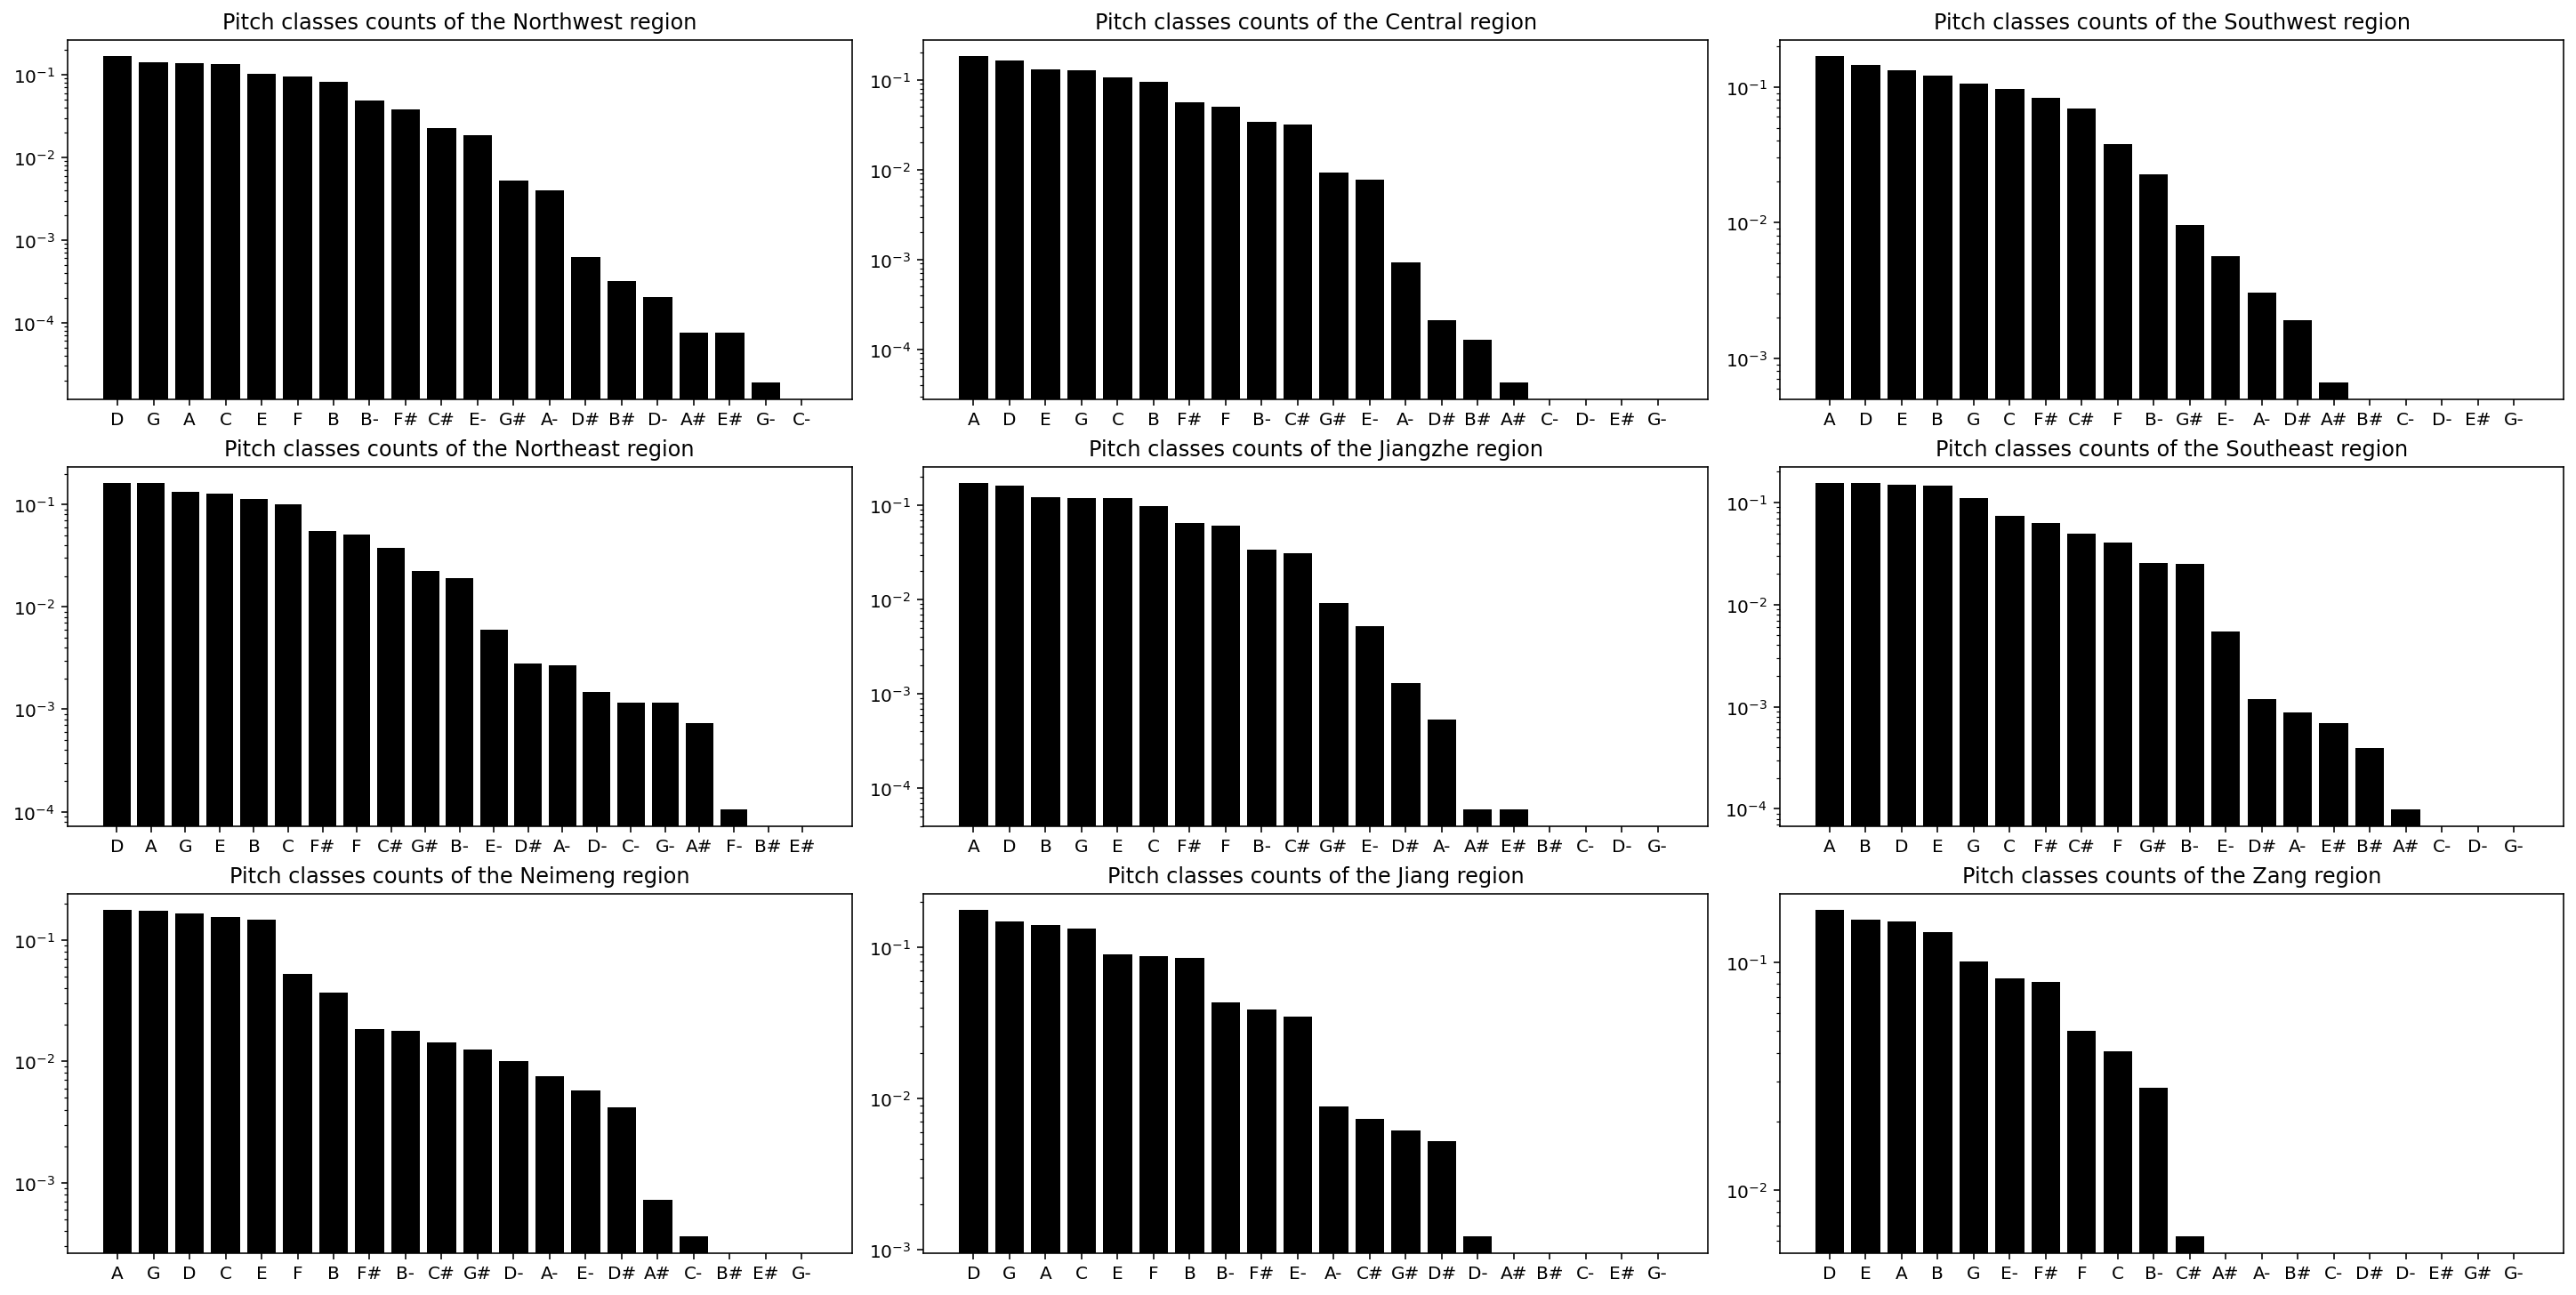

In [9]:
plot_region_stat_counts(region_pitch_classes_stat, pitchclasses_defcount, log_y=True, title="Pitch classes counts of the {} region")

A visual comparison of these plots again reveals a great similarity between all regions as `A`, `D` and `E` most often closely compete for the three most used pitch classes (except for Jiang region). However, we notice once again a significant difference in the Neimeng region, where there is a drop after the 5 most used pitch classes.

These results once again go against our hypothesis. However, the singular example of the Neimeng region must be remembered for the rest of the analysis.

### Scale degrees statistics (without metrical information)
In our research questions, we were particularly interested in the organization of the piece around the central pitch. For that reason, we transposed all pieces to C relatively to their tonic. Analyzing the pitches of these transposed scores reveals information about the use of scale degrees.

As a first analysis, we plot the distribution of use of scale degrees by simply counting them. Note that for simplicity, instead of labeling the plots with scale degrees, they are simply labeled with their pitch class relative to C. Therefore G is V, D is II, etc...

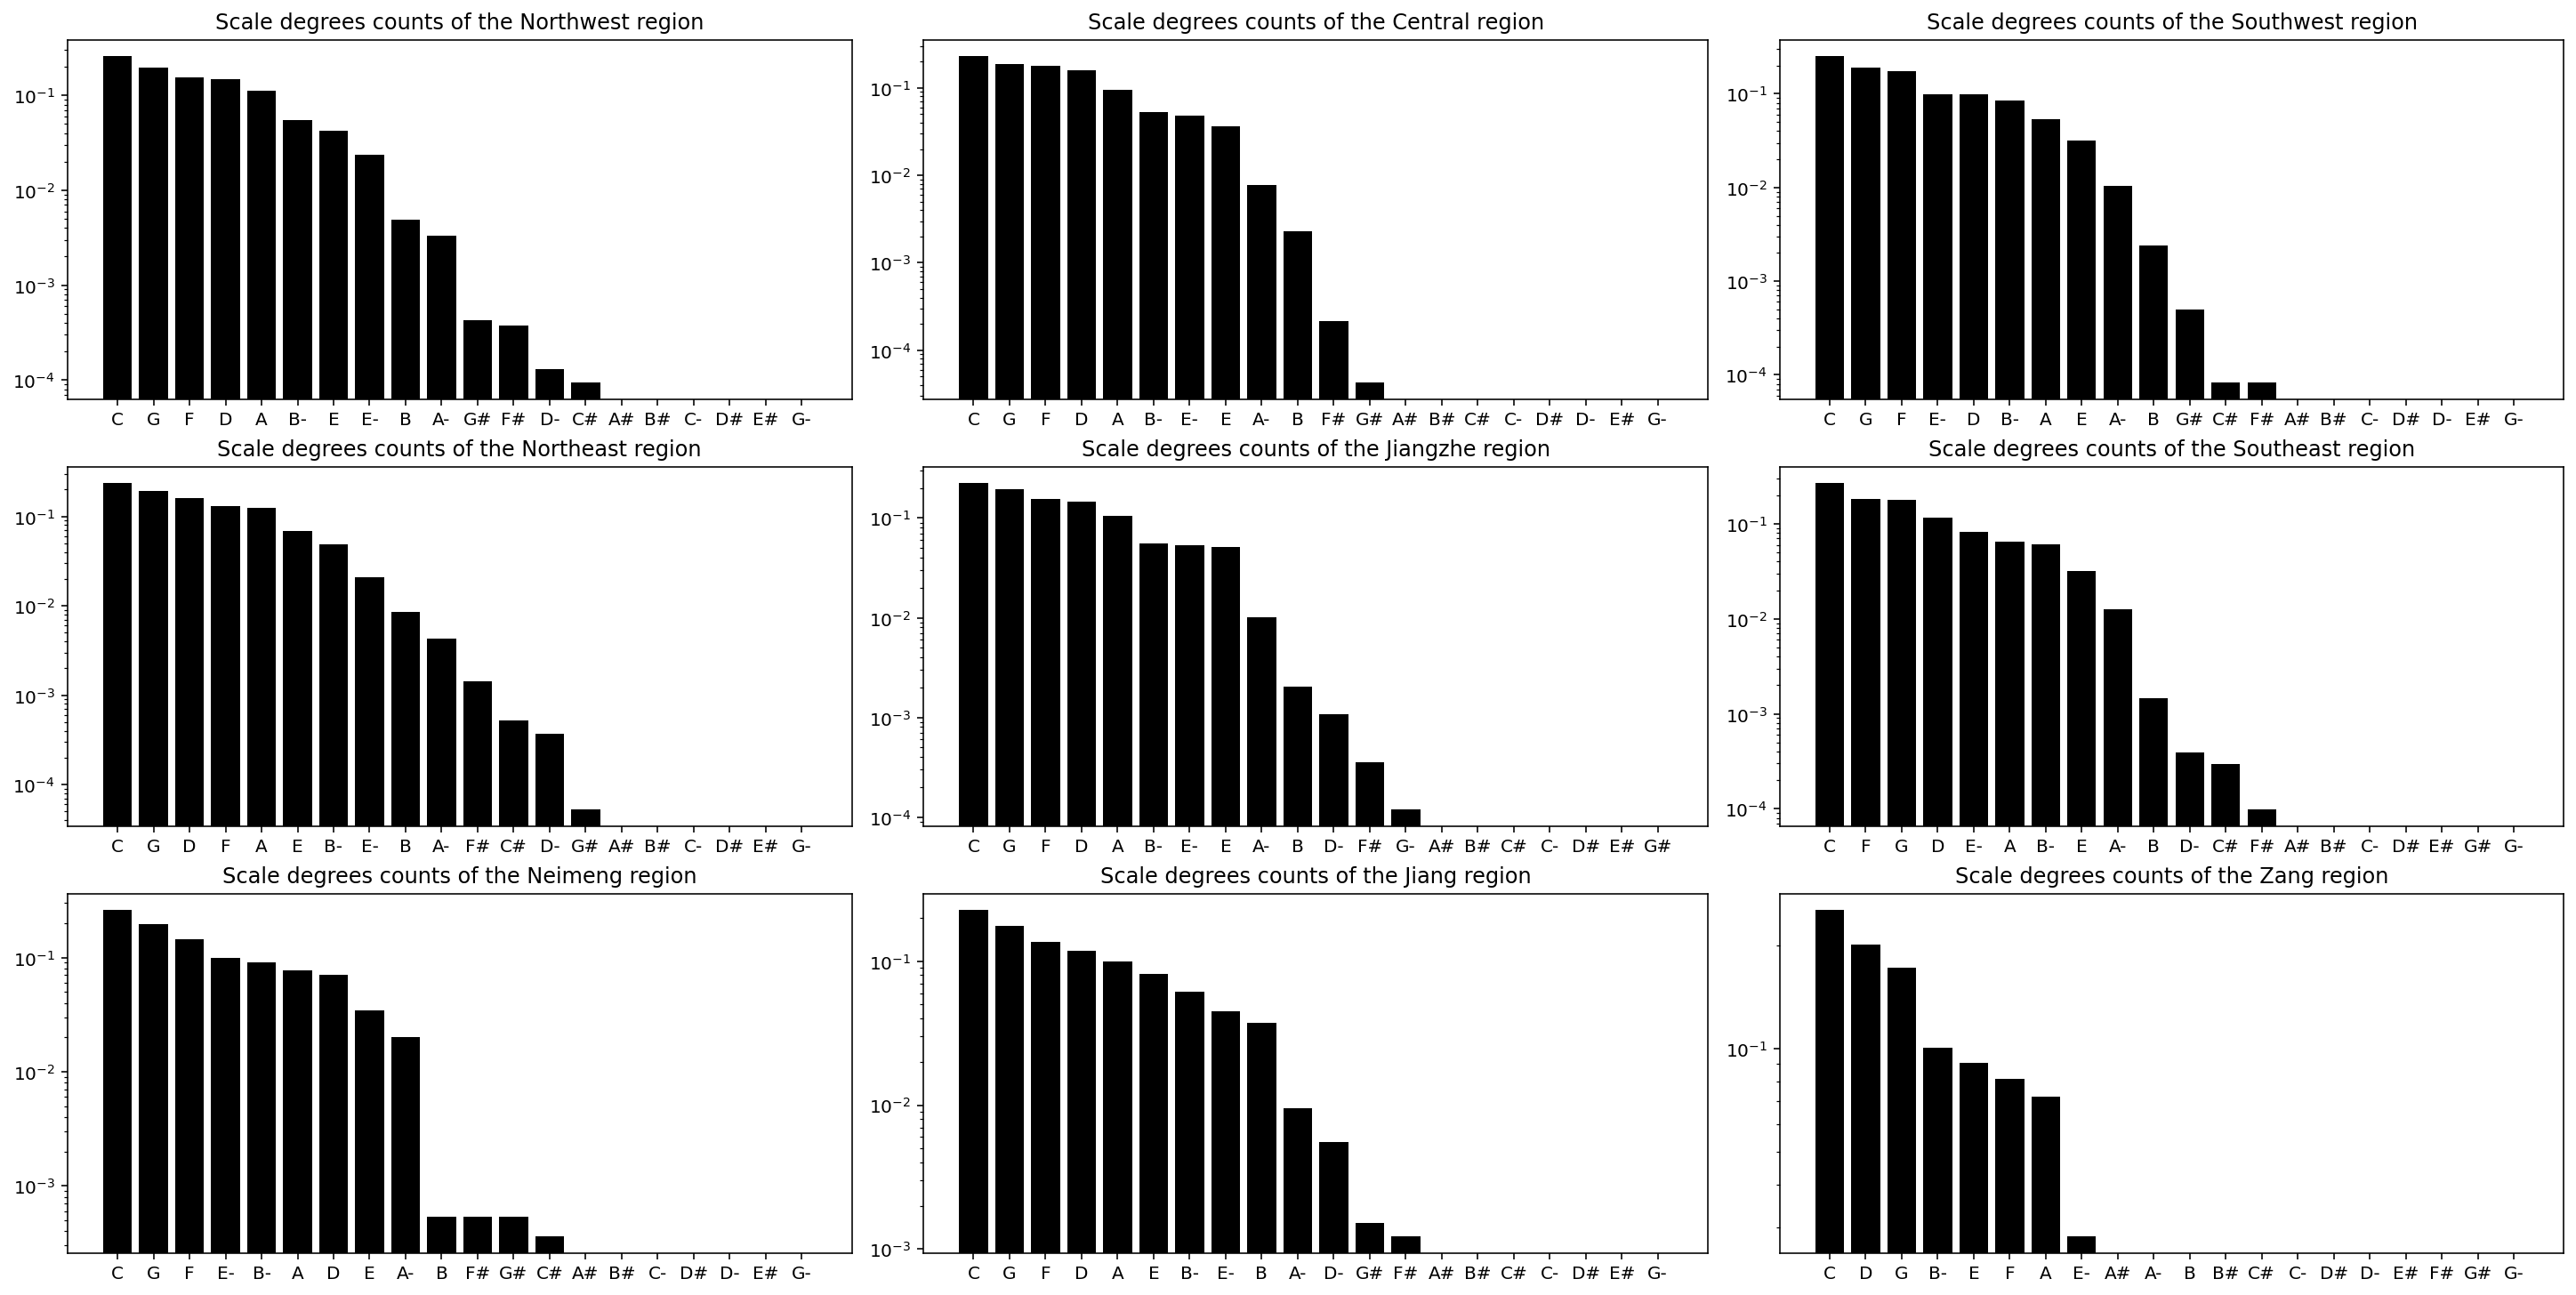

In [10]:
plot_region_stat_counts(region_scaledegrees_stat, pitchclasses_defcount, log_y=True, title="Scale degrees counts of the {} region")

These plots reveal that the distributions of use of scale degrees across regions are vastly similar, thus once again refuting our initial hypothesis. However, it is interesting to note that like in Western music, the fifth and fourth are the most dominant scale degrees.

### Pitch Classes Transitions (without metrical information)

Another means to compare the organization of songs of different divisions is to look at the transitions between the pitches. Comparing these transitions will reveal whether the folks preferred certain pitch transitions to others and may show significant differences across regions.

For this purpose, we create a dictionary to store the count of transitions of the pitch classes in all pieces belonging to one division. The name of the division is the key of the mentioned dictionary and the value is a nested dictionary with keys as the starting pitch class and the values as dictionaries with key as the transitioned pitch class and value as the count of such occurrence.

Now using the pitch class transitions in each division we create a network with pitch class as the nodes and creating an edge in case there is a transition between the nodes. The graph will be directed meaning there exists an edge only in the direction where the pitch transition occurs.

We plot the transitions as heatmaps to help in the interpretation. To create them, we first convert the transition counts from a dictionary to a `DataFrame` and use it to plot the heatmap.

In [11]:
pitchclass_transition_absolute = {geo_region: {} for geo_region in geo_divisions}
for index, row in CFS_full.iterrows():
    prev_pitchclass = None
    region = row["geo_division"]
    for pitchclass in row["pitchclasses_transposed"]:
        if prev_pitchclass is not None:
            if prev_pitchclass not in pitchclass_transition_absolute[region]:
                pitchclass_transition_absolute[region][prev_pitchclass] = {}
            if pitchclass not in  pitchclass_transition_absolute[region][prev_pitchclass]:
                pitchclass_transition_absolute[region][prev_pitchclass][pitchclass] = 1
            else:
                pitchclass_transition_absolute[region][prev_pitchclass][pitchclass] += 1
        prev_pitchclass = pitchclass

In [12]:
def sort_dict(item):
    # function to sort a nested dictionary based on key
    # credits: https://gist.github.com/gyli/f60f0374defc383aa098d44cfbd318eb
    return {k: sort_dict(v) if isinstance(v, dict) else v for k, v in sorted(item.items())}

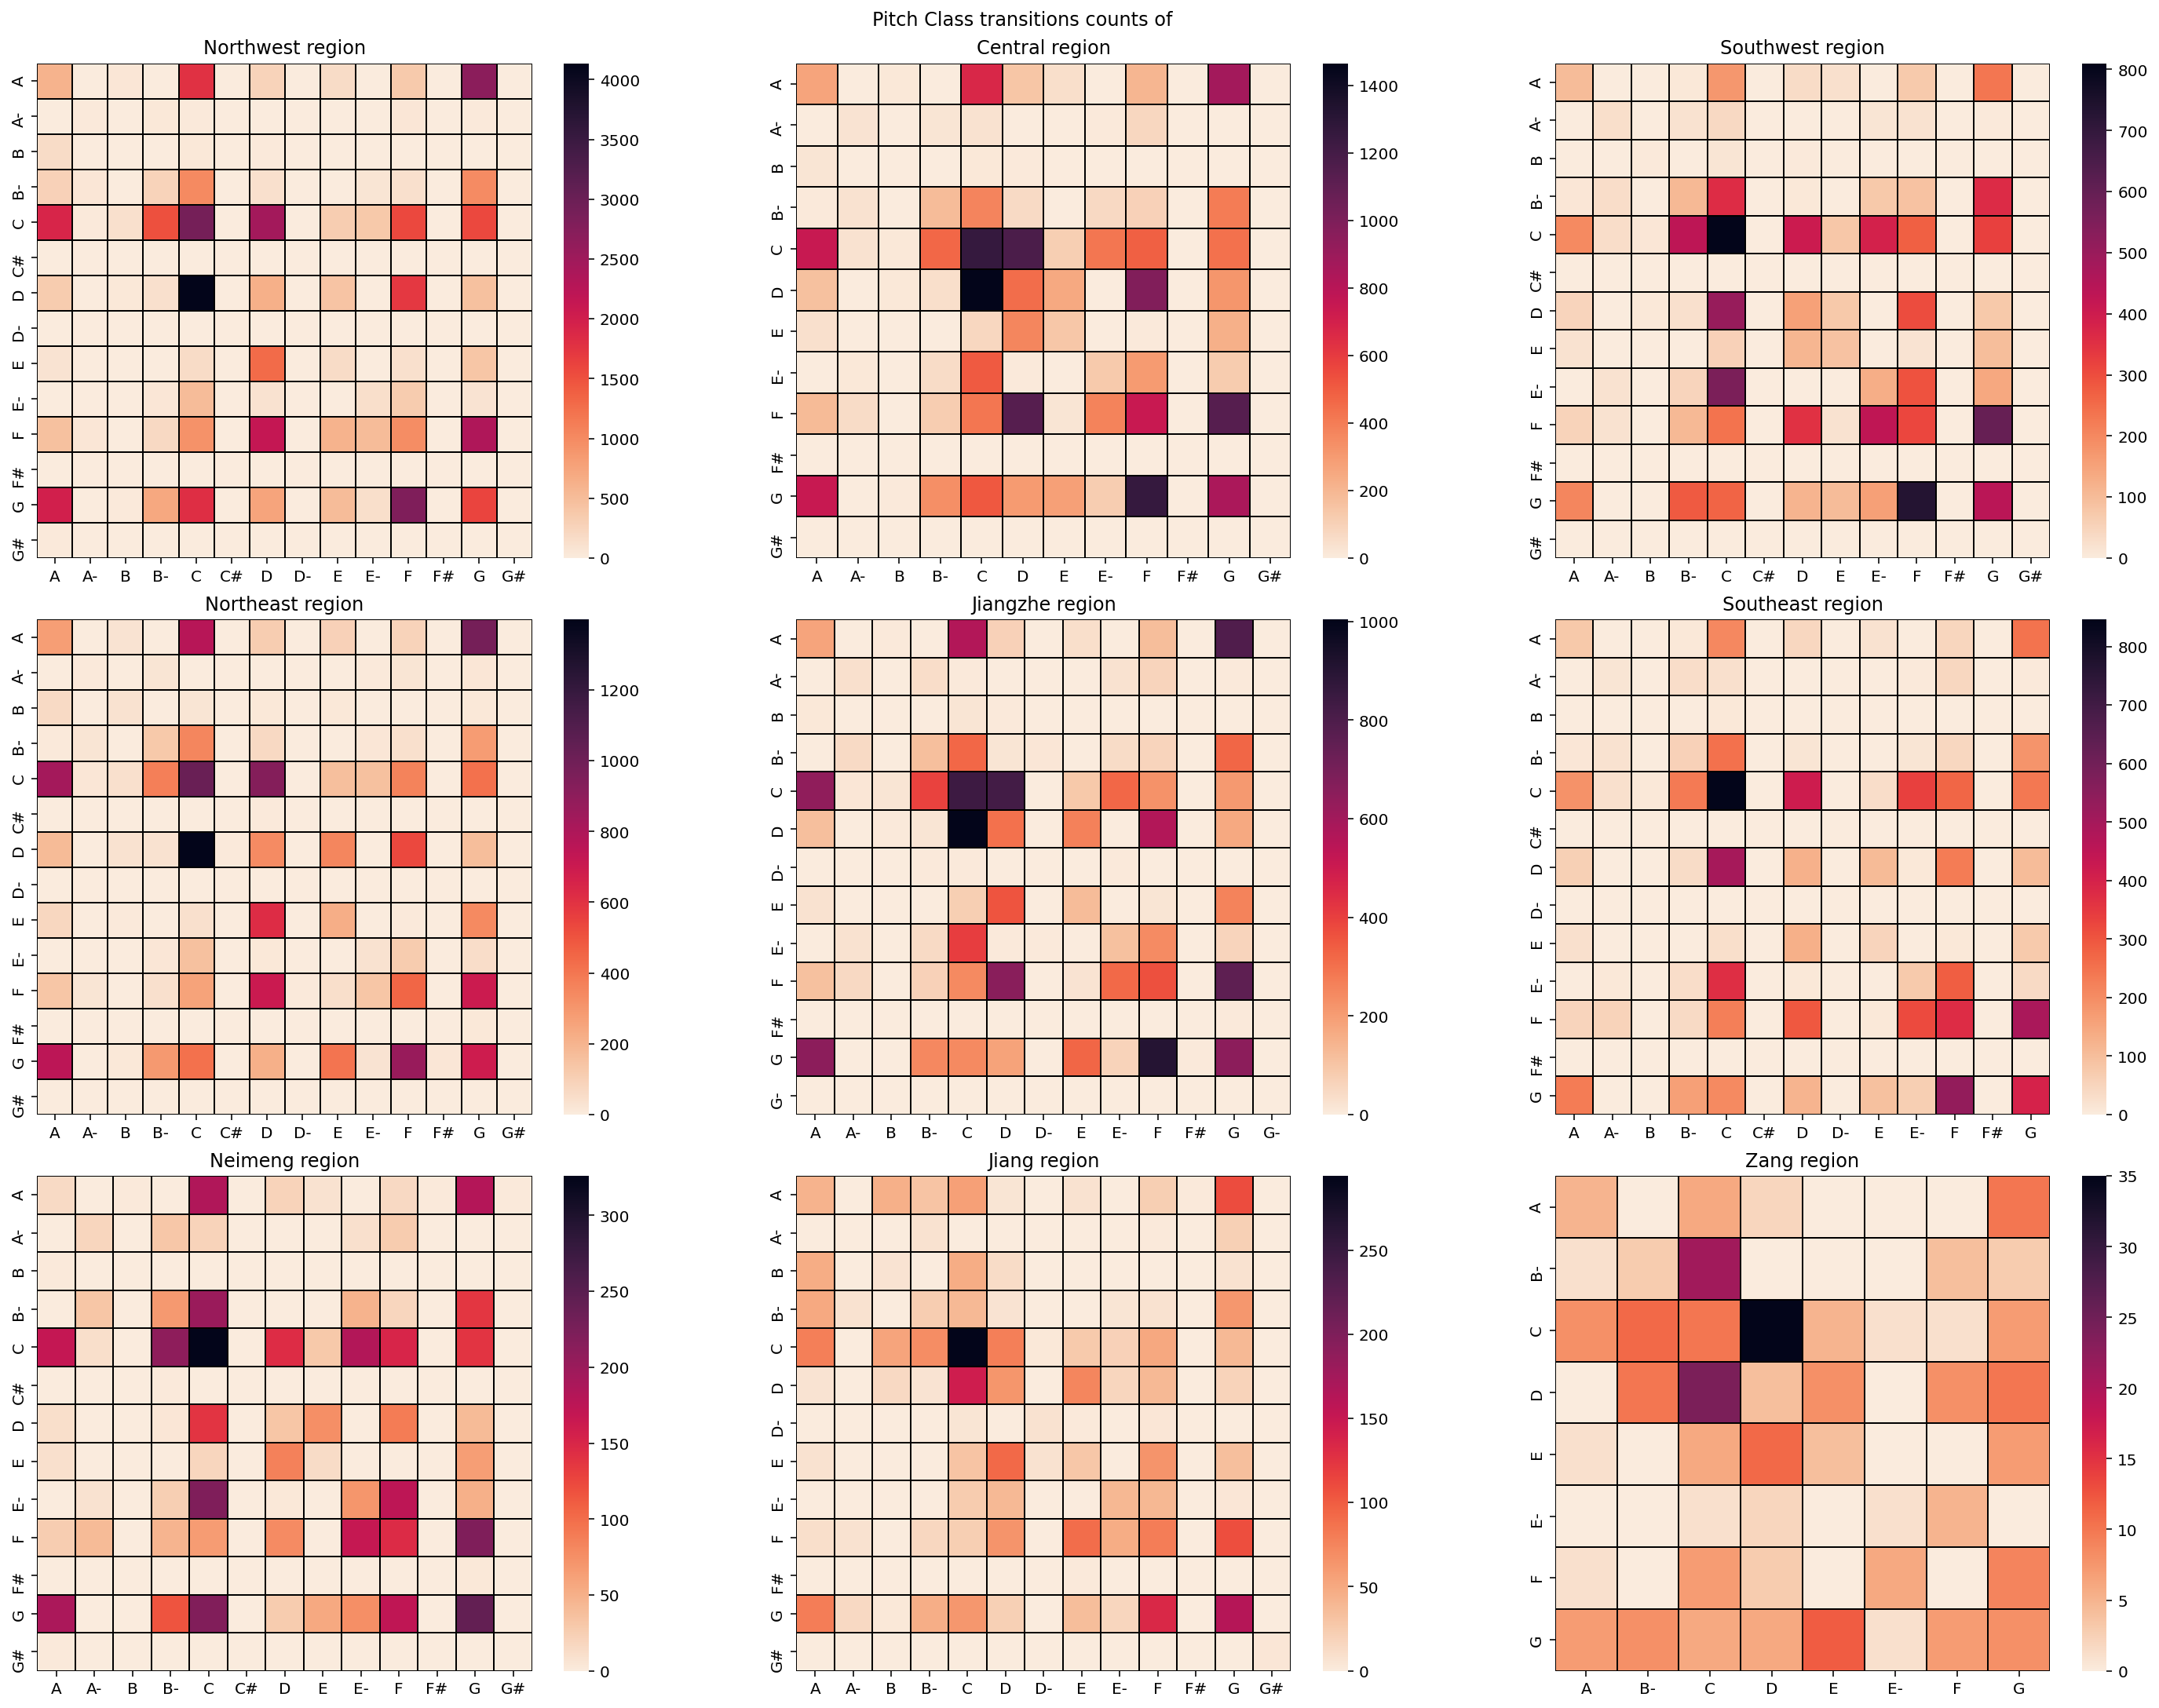

In [13]:
plt.rcParams["figure.figsize"] = (20, 15)
colormap = sns.color_palette("rocket_r", as_cmap=True)
fig, axes = plt.subplots(3,3, constrained_layout=True)
fig.suptitle("Pitch Class transitions counts of")
for gloc, ax in zip(geo_divisions, axes.flat):
    
    sorted_probs = sort_dict(pitchclass_transition_absolute[gloc])
    gloc_matrix = pd.DataFrame.from_dict(sorted_probs).T.fillna(0)
    gloc_matrix = gloc_matrix.reindex(sorted(gloc_matrix.columns), axis=1)
    
    sns.heatmap(gloc_matrix, cmap= colormap, square=True, linecolor='black', linewidths=0.1, vmin=0,ax=ax)
    ax.set_title("{} region".format(gloc))

### Interval Transitions (without metrical information)

Another means to compare the organization of songs of different divisions is to look at the transitions between the intervals.

For this purpose, we create a dictionary to store the count of transitions of the intervals in all pieces belonging to one division. The name of the division is the key of the mentioned dictionary and the value is the count of such occurrence.

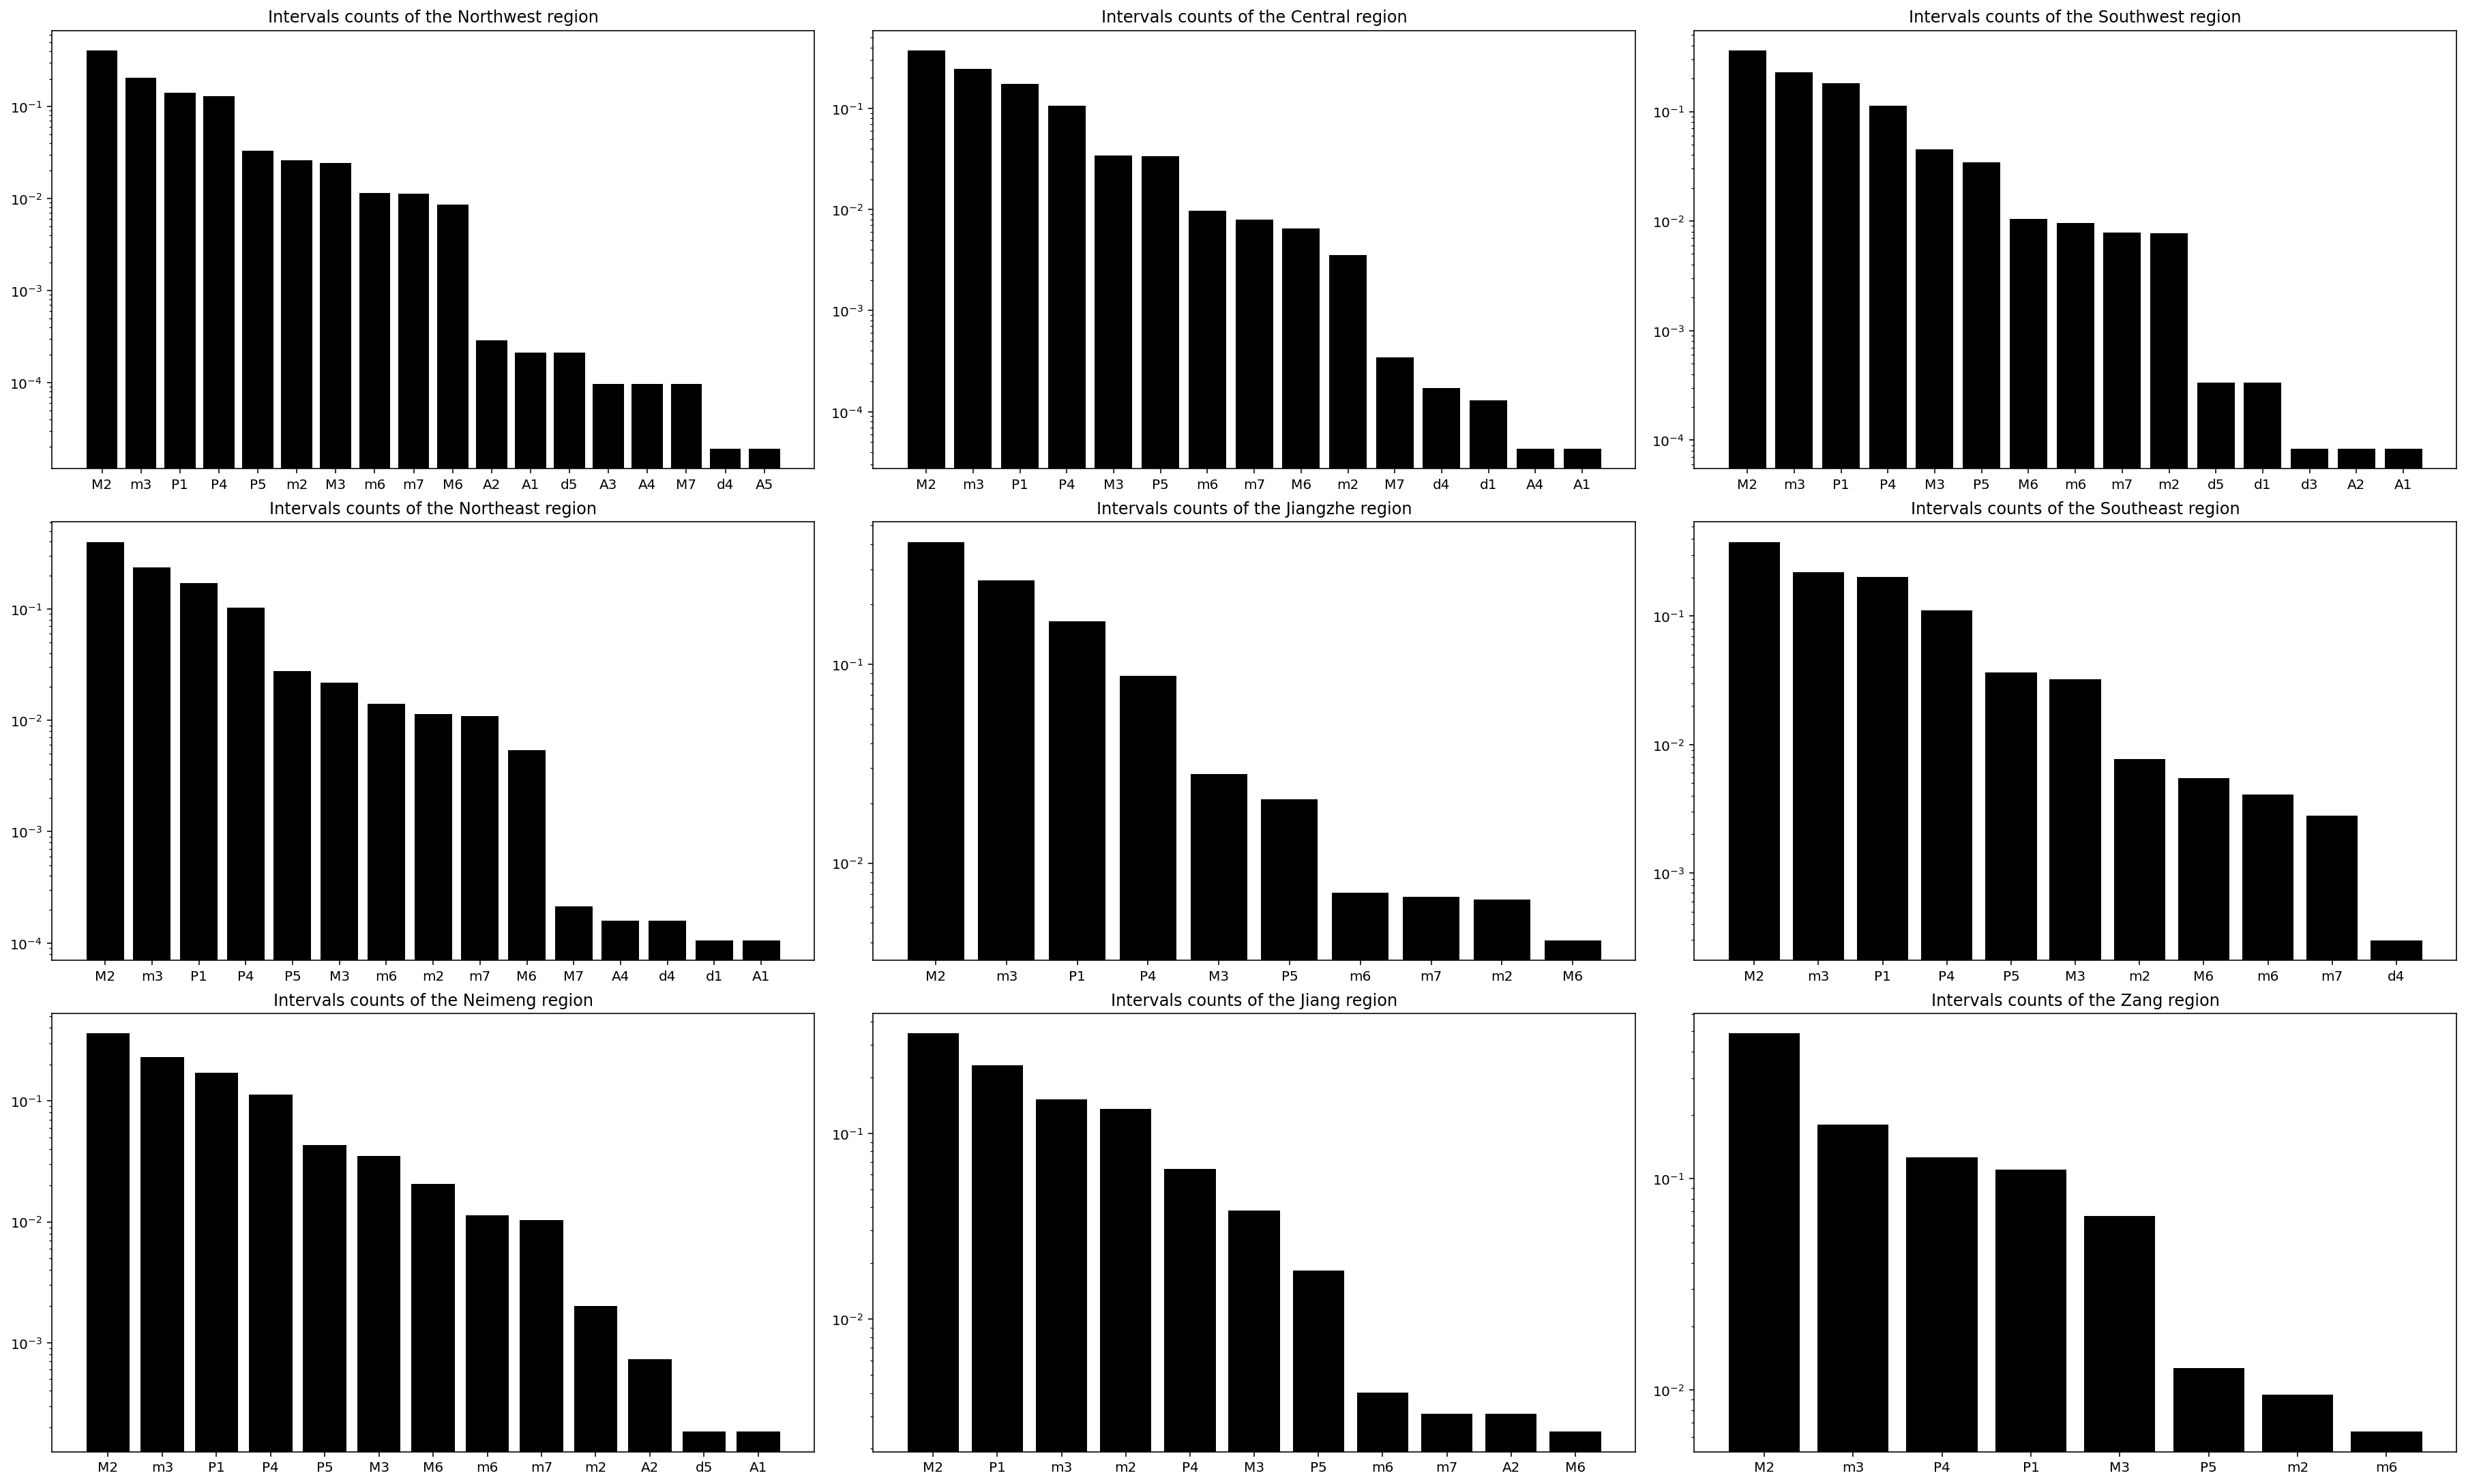

In [14]:
plot_region_stat_counts(region_intervals_stat, log_y=True, figsize=(25,15), title="Intervals counts of the {} region")

### Scale Degree statistics (with metrical information)

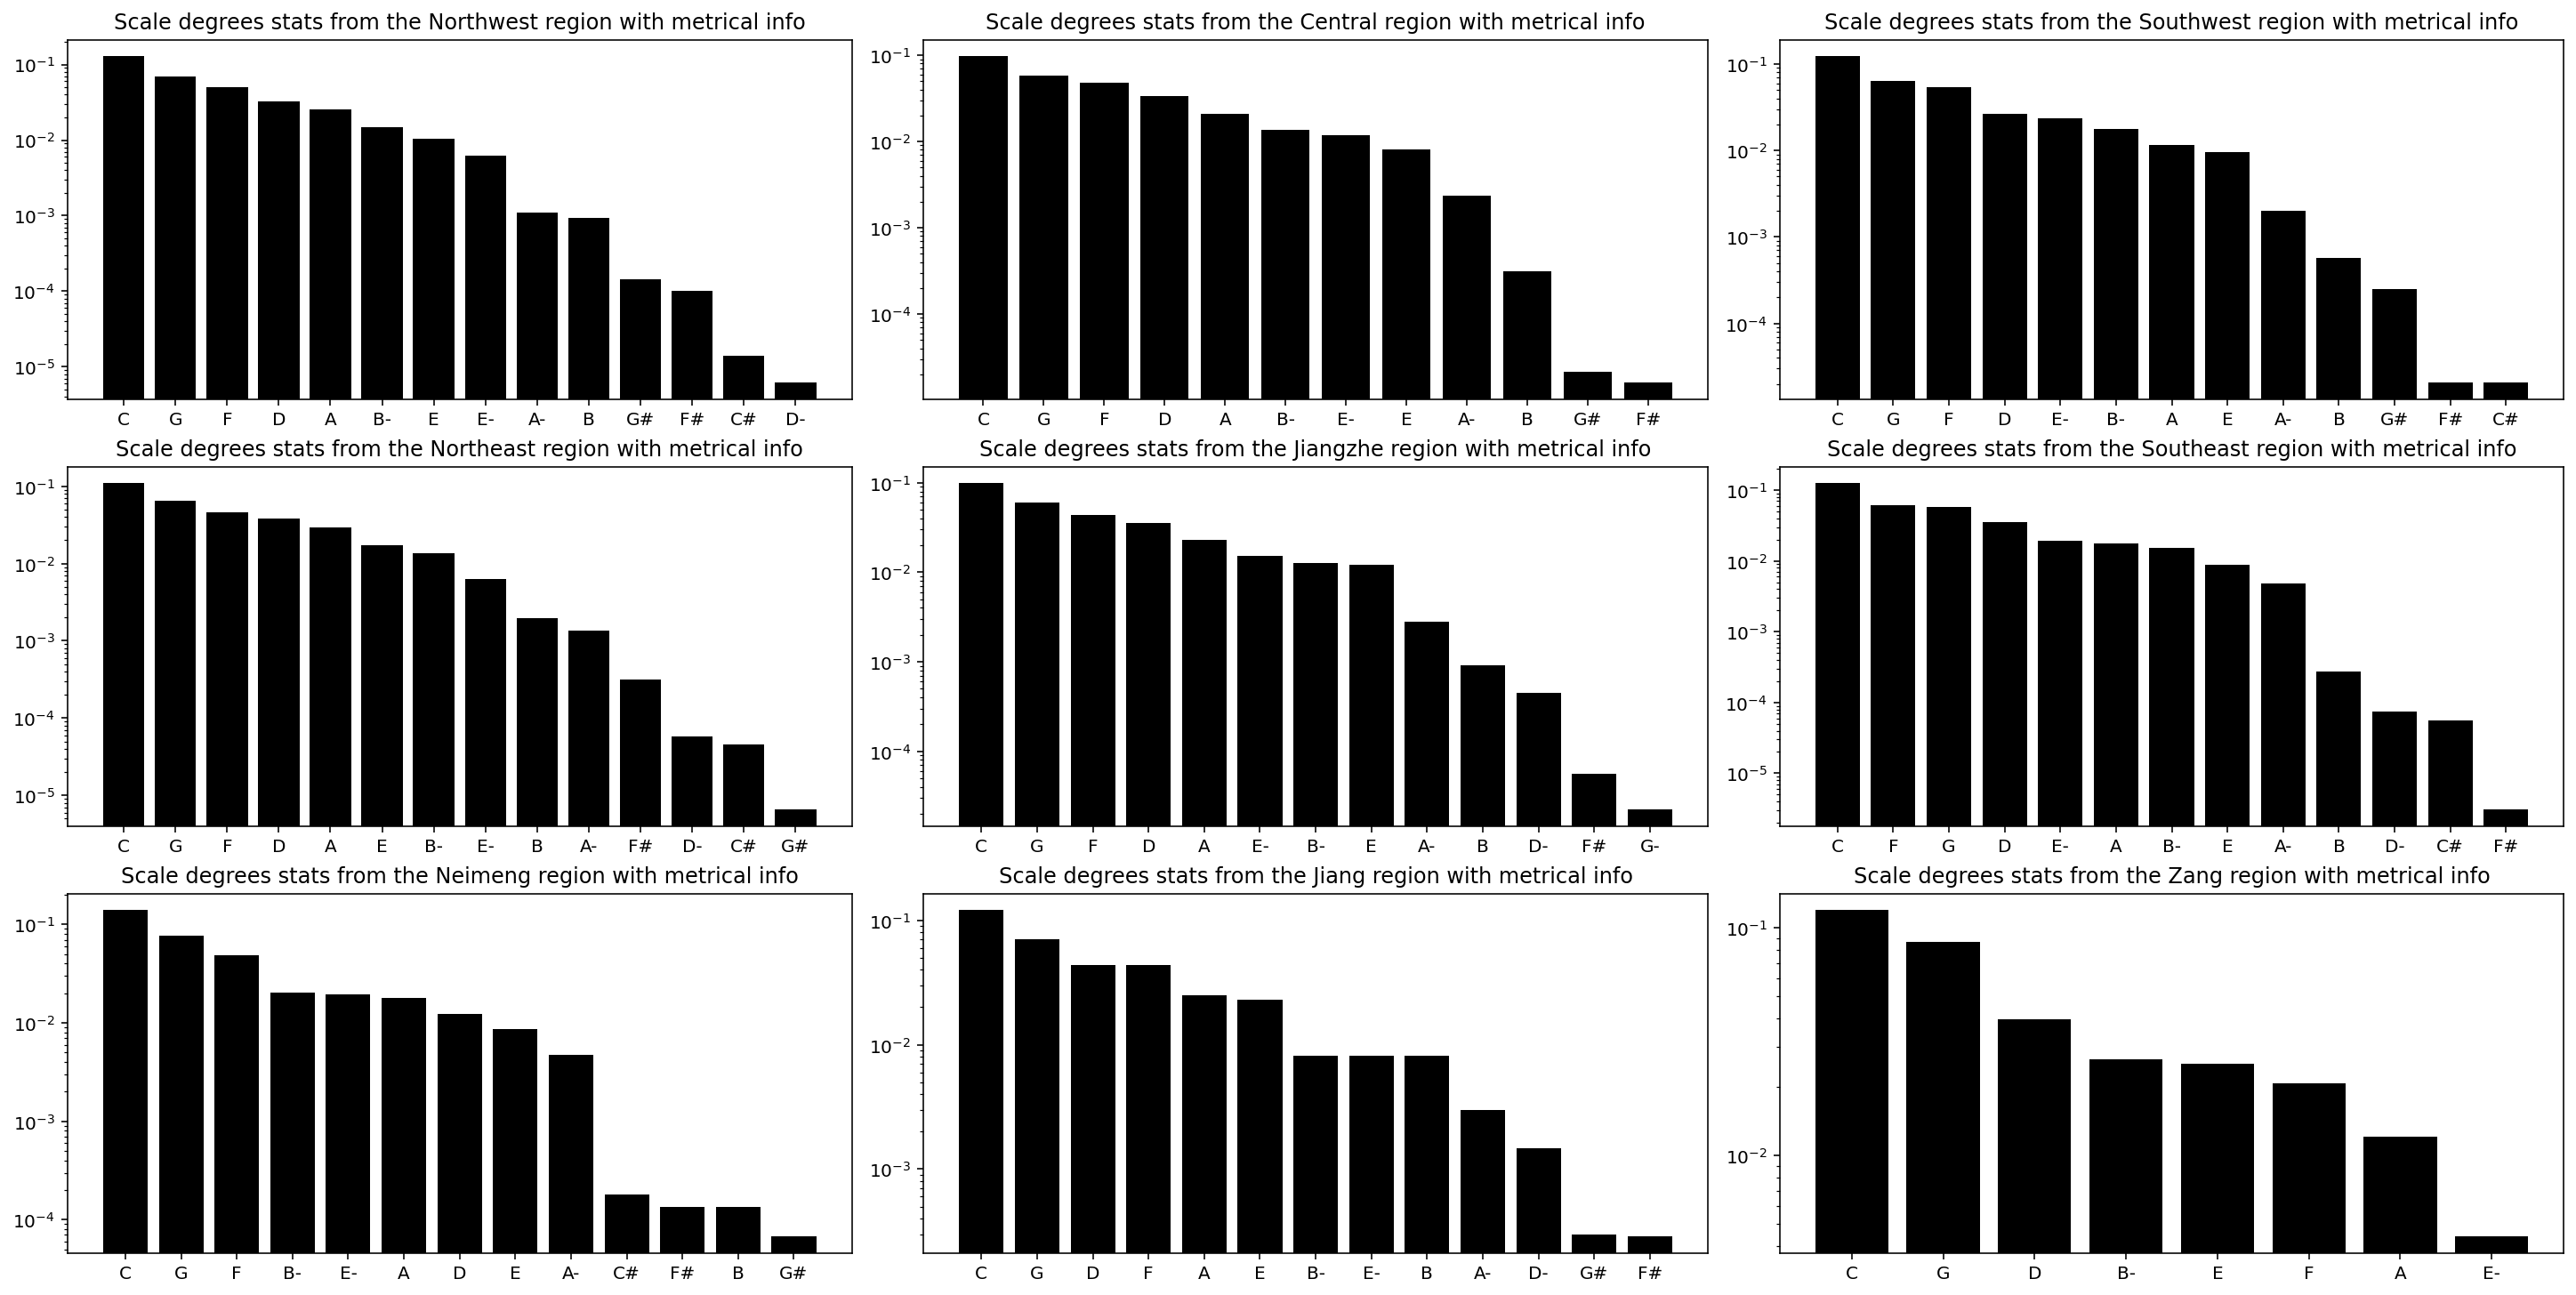

In [27]:
plot_region_stat_met(region_scaledegrees_stat, log_y=True, title="Scale degrees stats from the {} region with metrical info")

# Transitions using local beat strengths

In [16]:
pitchclass_transition_localbs_S2W = {geo_region: {} for geo_region in geo_divisions}
pitchclass_transition_localbs_W2S = {geo_region: {} for geo_region in geo_divisions}
pitchclass_transition_localbs_E2E = {geo_region: {} for geo_region in geo_divisions}

for index, row in CFS_full.iterrows():
    prev_pitchclass = None
    region = row["geo_division"]
    
    for i in range(len(row["pitchclasses_transposed"])):
        
        curr_bs = row["beat_strengths"][i]
        curr_pitchclass = row["pitchclasses_transposed"][i]
        if prev_pitchclass is not None:
            
            if curr_bs > prev_bs:
                
                curr_node_name = curr_pitchclass + "_S"
                prev_node_name = prev_pitchclass + "_W"
                
                if prev_node_name not in pitchclass_transition_localbs_W2S[region]:
                    pitchclass_transition_localbs_W2S[region][prev_node_name] = {}
            
                if curr_node_name not in  pitchclass_transition_localbs_W2S[region][prev_node_name]:
                    pitchclass_transition_localbs_W2S[region][prev_node_name][curr_node_name] = 1
                else:
                    pitchclass_transition_localbs_W2S[region][prev_node_name][curr_node_name] += 1
                    
            elif curr_bs < prev_bs:
                curr_node_name = curr_pitchclass + "_W"
                prev_node_name = prev_pitchclass + "_S"
                
                if prev_node_name not in pitchclass_transition_localbs_S2W[region]:
                    pitchclass_transition_localbs_S2W[region][prev_node_name] = {}
            
                if curr_node_name not in  pitchclass_transition_localbs_S2W[region][prev_node_name]:
                    pitchclass_transition_localbs_S2W[region][prev_node_name][curr_node_name] = 1
                else:
                    pitchclass_transition_localbs_S2W[region][prev_node_name][curr_node_name] += 1
                    
            else:
                curr_node_name = curr_pitchclass + "_E"
                prev_node_name = prev_pitchclass + "_E"
                
                if prev_node_name not in pitchclass_transition_localbs_E2E[region]:
                    pitchclass_transition_localbs_E2E[region][prev_node_name] = {}
            
                if curr_node_name not in  pitchclass_transition_localbs_E2E[region][prev_node_name]:
                    pitchclass_transition_localbs_E2E[region][prev_node_name][curr_node_name] = 1
                else:
                    pitchclass_transition_localbs_E2E[region][prev_node_name][curr_node_name] += 1
            
        prev_pitchclass = curr_pitchclass
        prev_bs = curr_bs

In [17]:
# cut_off_prob = 0
# normalised_pitchclass_transition_localbs = deepcopy(pitchclass_transition_localbs)       
# for geo_region in normalised_pitchclass_transition_localbs:
#     for start_node in normalised_pitchclass_transition_localbs[geo_region]:
#         total_count_at_node = sum(normalised_pitchclass_transition_localbs[geo_region][start_node].values())
#         temp_dict = {}
#         for end_node in normalised_pitchclass_transition_localbs[geo_region][start_node]:
#             normalised_prob = (normalised_pitchclass_transition_localbs[geo_region][start_node][end_node]/total_count_at_node)
#             if normalised_prob > cut_off_prob:
#                 temp_dict[end_node] = normalised_prob
#         normalised_pitchclass_transition_localbs[geo_region][start_node] = temp_dict

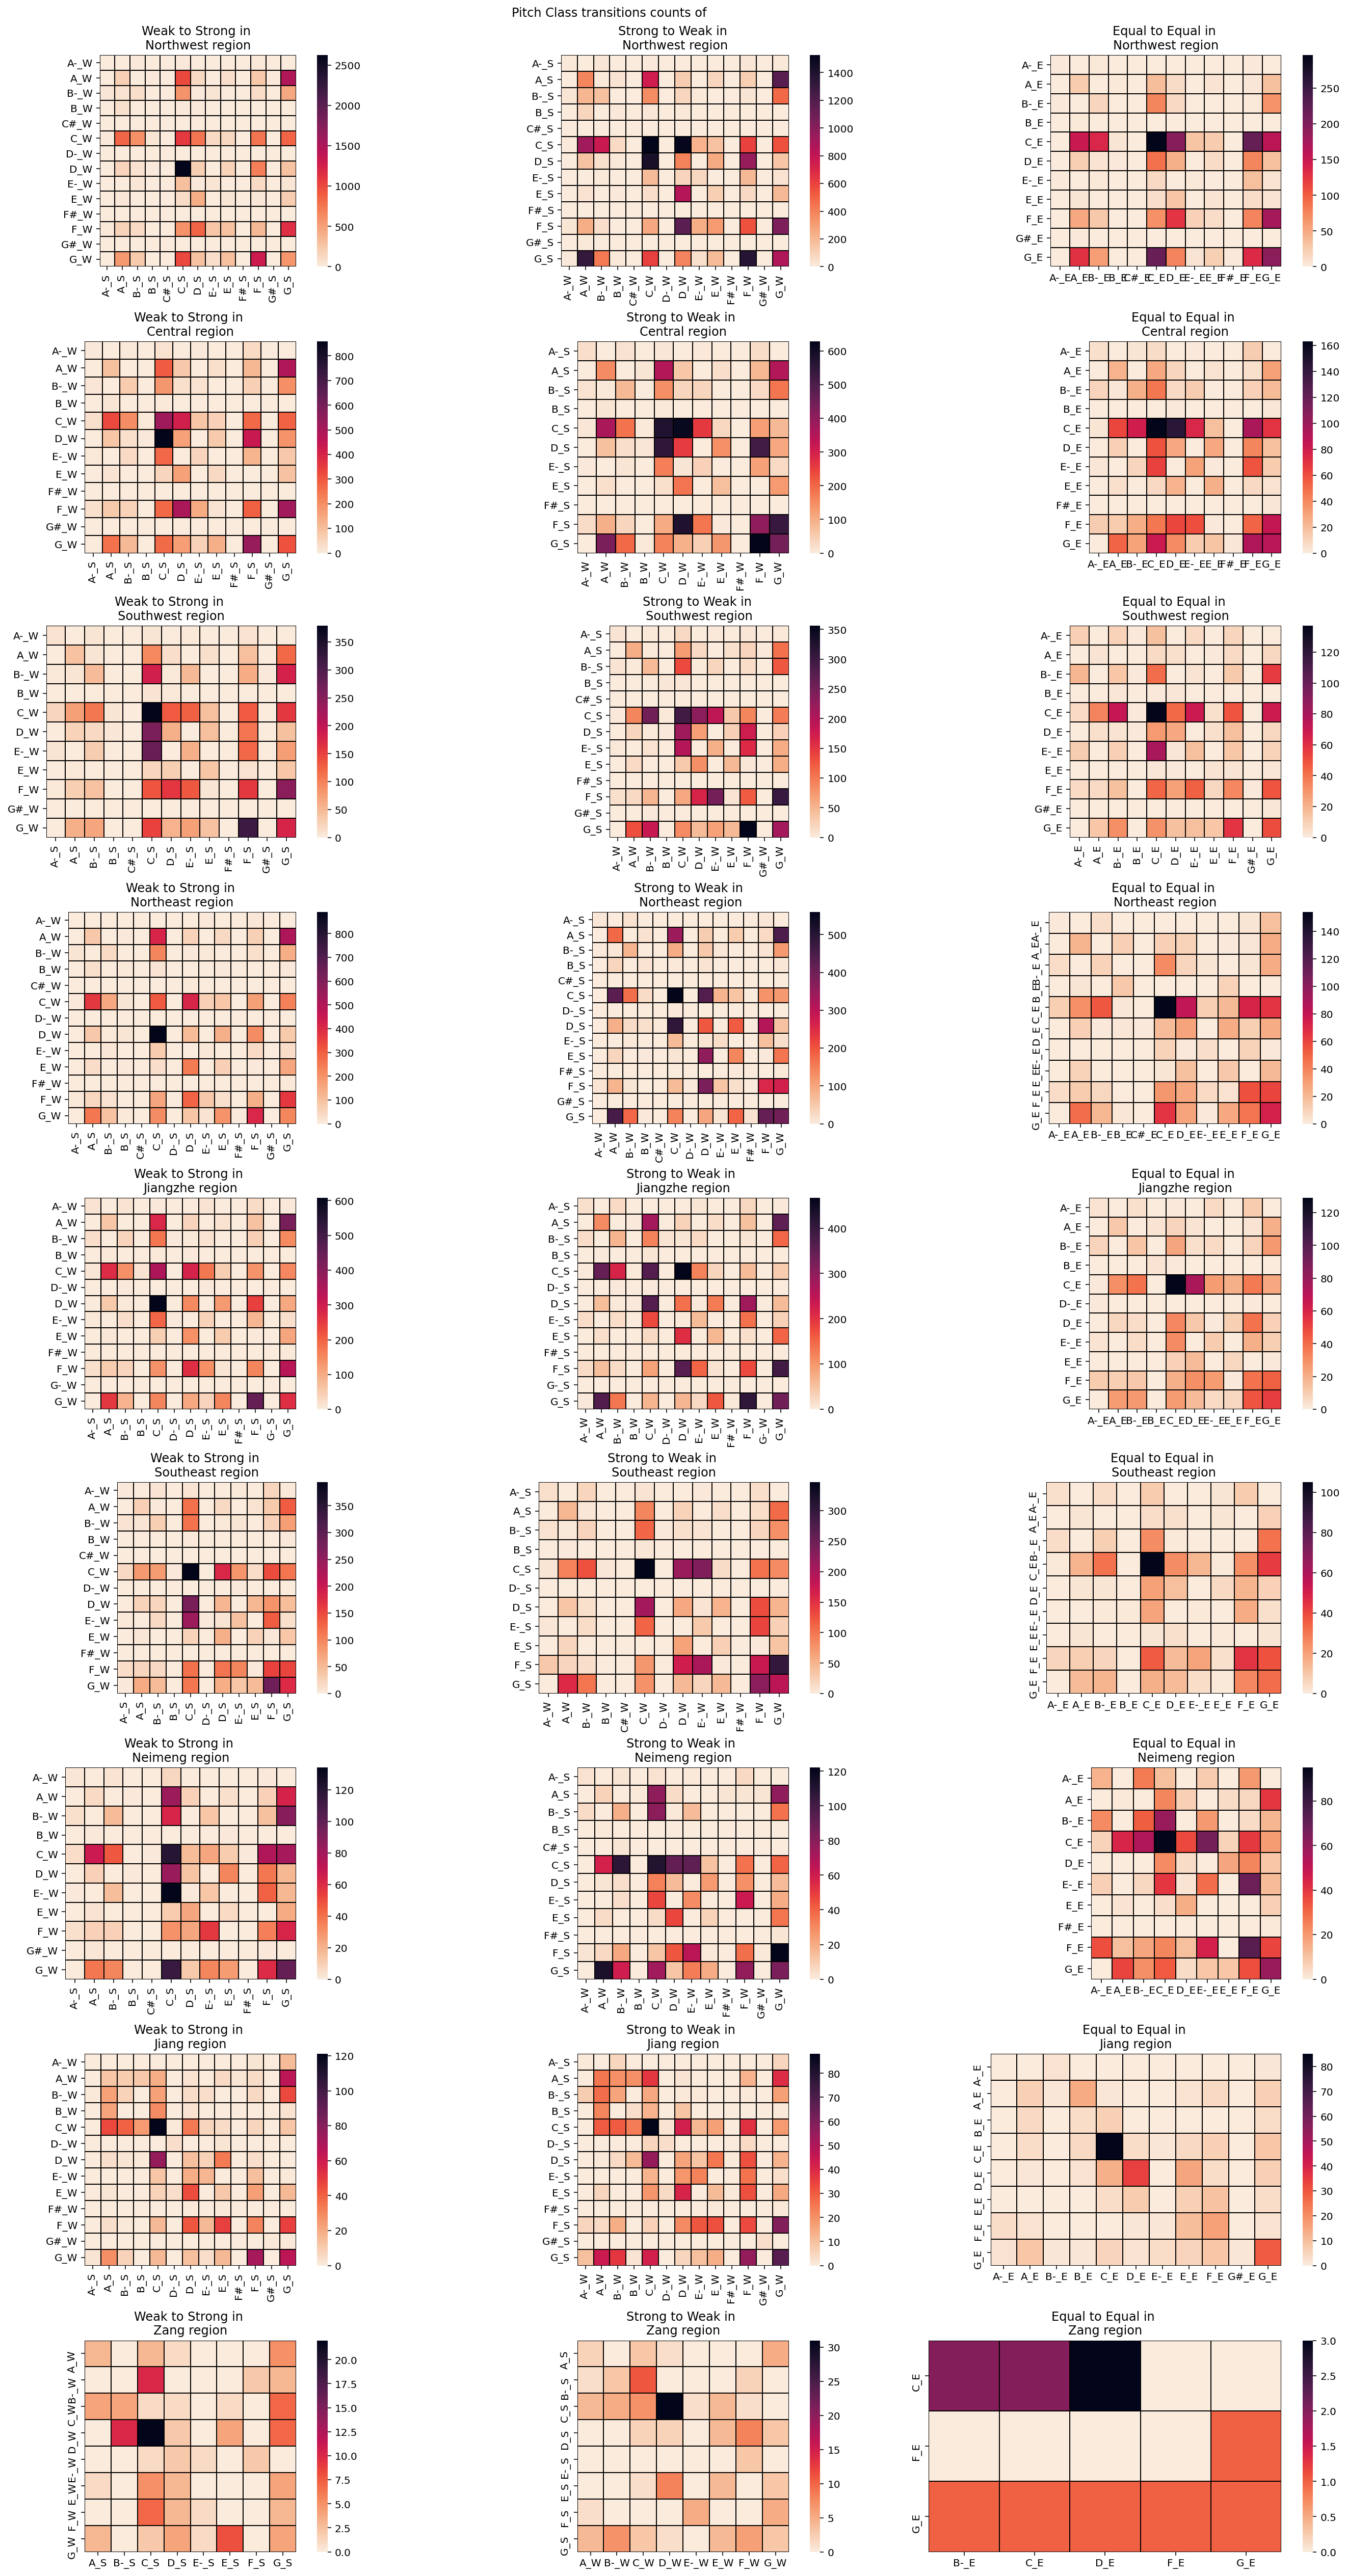

In [18]:
plt.rcParams["figure.figsize"] = (20, 35)
colormap = sns.color_palette("rocket_r", as_cmap=True)
fig, axes = plt.subplots(9,3, constrained_layout=True)
fig.suptitle("Pitch Class transitions counts of")
for ind, gloc in enumerate(geo_divisions):
    
    sorted_probs = sort_dict(pitchclass_transition_localbs_W2S[gloc])
    gloc_matrix = pd.DataFrame.from_dict(sorted_probs).T.fillna(0)
    gloc_matrix = gloc_matrix.reindex(sorted(gloc_matrix.columns), axis=1)
    
    ax1 = sns.heatmap(gloc_matrix, cmap= colormap, square=True, linecolor='black', linewidths=0.1, vmin=0, ax=axes[ind][0])
    ax1.set_title("Weak to Strong in \n{} region".format(gloc))
    
    sorted_probs = sort_dict(pitchclass_transition_localbs_S2W[gloc])
    gloc_matrix = pd.DataFrame.from_dict(sorted_probs).T.fillna(0)
    gloc_matrix = gloc_matrix.reindex(sorted(gloc_matrix.columns), axis=1)
    
    ax2 = sns.heatmap(gloc_matrix, cmap= colormap, square=True, linecolor='black', linewidths=0.1, vmin=0, ax=axes[ind][1])
    ax2.set_title("Strong to Weak in \n{} region".format(gloc))
    
    sorted_probs = sort_dict(pitchclass_transition_localbs_E2E[gloc])
    gloc_matrix = pd.DataFrame.from_dict(sorted_probs).T.fillna(0)
    gloc_matrix = gloc_matrix.reindex(sorted(gloc_matrix.columns), axis=1)
    
    ax3 = sns.heatmap(gloc_matrix, cmap= colormap, square=True, linecolor='black', linewidths=0.1, vmin=0, ax=axes[ind][2])
    ax3.set_title("Equal to Equal in \n{} region".format(gloc))

# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

# Flexibity (entropy)

In [19]:
pitchclass_transition_probability = {geo_region: {} for geo_region in geo_divisions}
for region, transitions in pitchclass_transition_absolute.items():
    for start_note, transition in transitions.items():
        pitchclass_transition_probability[region][start_note] = {}
        for landing_note, count in transition.items():
            pitchclass_transition_probability[region][start_note][landing_note] = count/sum(transition.values())

In [20]:
entropies = {geo_region: {} for geo_region in geo_divisions}
for region, transitions in pitchclass_transition_probability.items():
    for start_note, probabilities in transitions.items():
        entropies[region][start_note] = -sum([p*math.log2(p) for p in probabilities.values()])

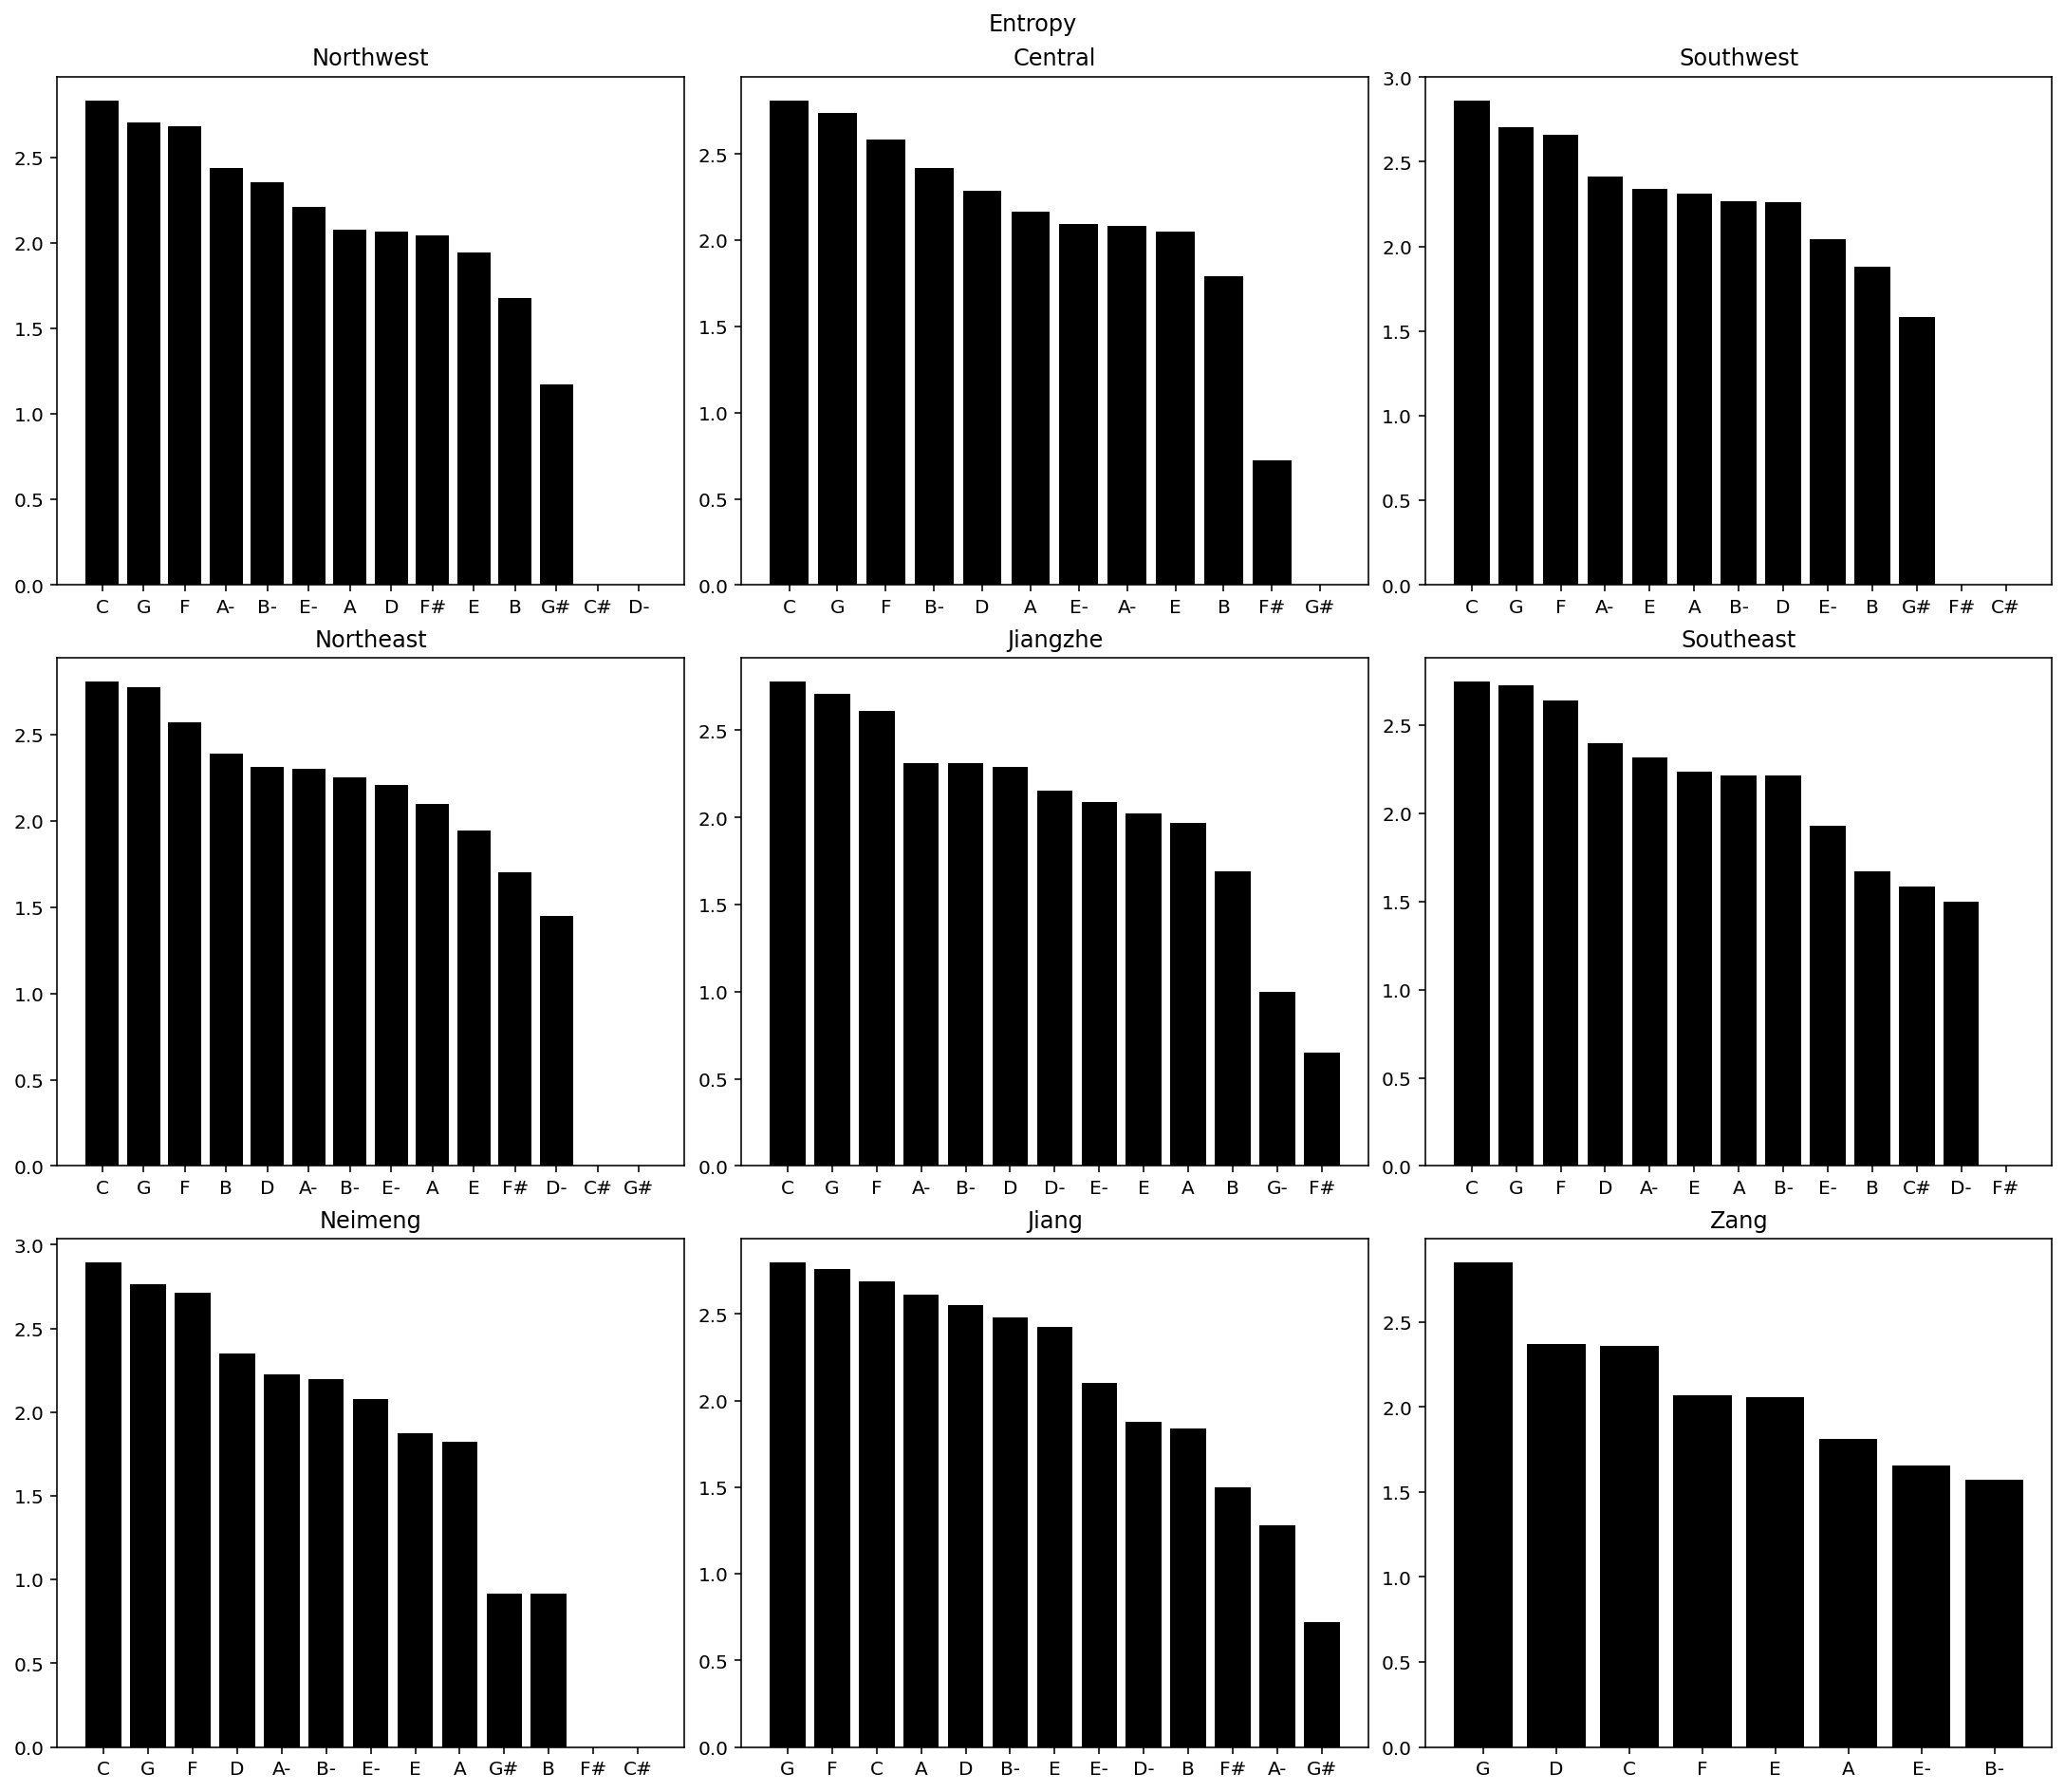

In [21]:
plt.rcParams["figure.figsize"] = (15, 13)
fig, axarr = plt.subplots(3, 3, constrained_layout=True)
fig.suptitle("Entropy")
for gloc, ax in zip(geo_divisions, axarr.flat):
    ax.set_title(gloc)
    sorted_entropies = {key: value for (key, value) in sorted(entropies[gloc].items(), key=lambda x: x[1], reverse=True)}    
    x = list(sorted_entropies.keys())
    y=list(sorted_entropies.values())
    ax.bar(x, y, color='black')
    ax.set_title("{}".format(gloc))

# Stable notes

To investigate the stable notes in each region we perform plain Markovian random walk using the probability transition matrix generated from the pieces of a given geographical division. 

Let A and D be the adjacency and degree matrices of a graph G, respectively. The transition matrix T is defined as $T = D^{-1}A$.
Let $p^{(0)}$ be the state vector (i.e. the i-th component indicates the probability of being at node i) at the beginning of the walk, the first step (walk) can be evaluated as $p^{(1)} = Tp^{(0)}$.

Iteratively, the k-th random walk step can be evaluated as $p^{(k)} = Tp^{(k-1)}$.

In [22]:
def perform_random_walk(transisition_dict, walk_length):
    
    visited = []
    
    graph = nx.DiGraph((k, v, {'weight': weight}) for k, vs in transisition_dict.items() for v, weight in vs.items())
    nodes = list(graph.nodes)
    num_nodes = len(nodes)
    
    # Adjacency matrix
    A = nx.adj_matrix(graph)
    A = A.todense()
    A = np.array(A, dtype = np.float64)
    
    # Degree matrix
    D = np.diag(np.sum(A, axis=0))
    # Transistion matrix
    T = np.dot(np.linalg.inv(D),A)
    # define the starting node, randomly
    empty_state = np.zeros(num_nodes)
    random_node = np.random.randint(low = 0, high = num_nodes-1, size = 1)[0]
    empty_state[random_node] = 1
    p = empty_state.reshape(-1,1)
    
    for k in range(walk_length):
        # next state vector
        p = np.dot(T,p)
        # choose the node with higher probability as the visited node
        visited.append(nodes[np.argmax(p)])
    return visited

In [23]:
print("The average length of piece per region: ")
print(CFS_full.groupby(['geo_division'])['length'].mean())

The average length of piece per region: 
geo_division
Central       78.256667
Jiang        108.866667
Jiangzhe      80.430622
Neimeng       51.925234
Northeast     87.114155
Northwest     49.877341
Southeast     69.657534
Southwest     78.733766
Zang         106.333333
Name: length, dtype: float64


In [24]:
region_avg_piece_length = {"Northwest":50, "Central":77, "Southwest":77, "Northeast":85, "Jiangzhe":80, "Southeast":68, "Neimeng":52, "Jiang":119, "Zang":106}
num_iter = 1000
region_random_walk = {}
exempt_regions = ["Northeast"]
for geo_region in pitchclass_transition_absolute:
    if geo_region not in exempt_regions:
        print("Region Processed: {}".format(geo_region))
        region_random_walk[geo_region] = []
        for _ in range(num_iter):
            region_random_walk[geo_region].extend(perform_random_walk(pitchclass_transition_absolute[geo_region], region_avg_piece_length[geo_region]))
    else:
        print("Region Exempted: {}".format(geo_region))

Region Processed: Northwest
Region Processed: Central
Region Processed: Southwest
Region Exempted: Northeast
Region Processed: Jiangzhe
Region Processed: Southeast
Region Processed: Neimeng
Region Processed: Jiang
Region Processed: Zang


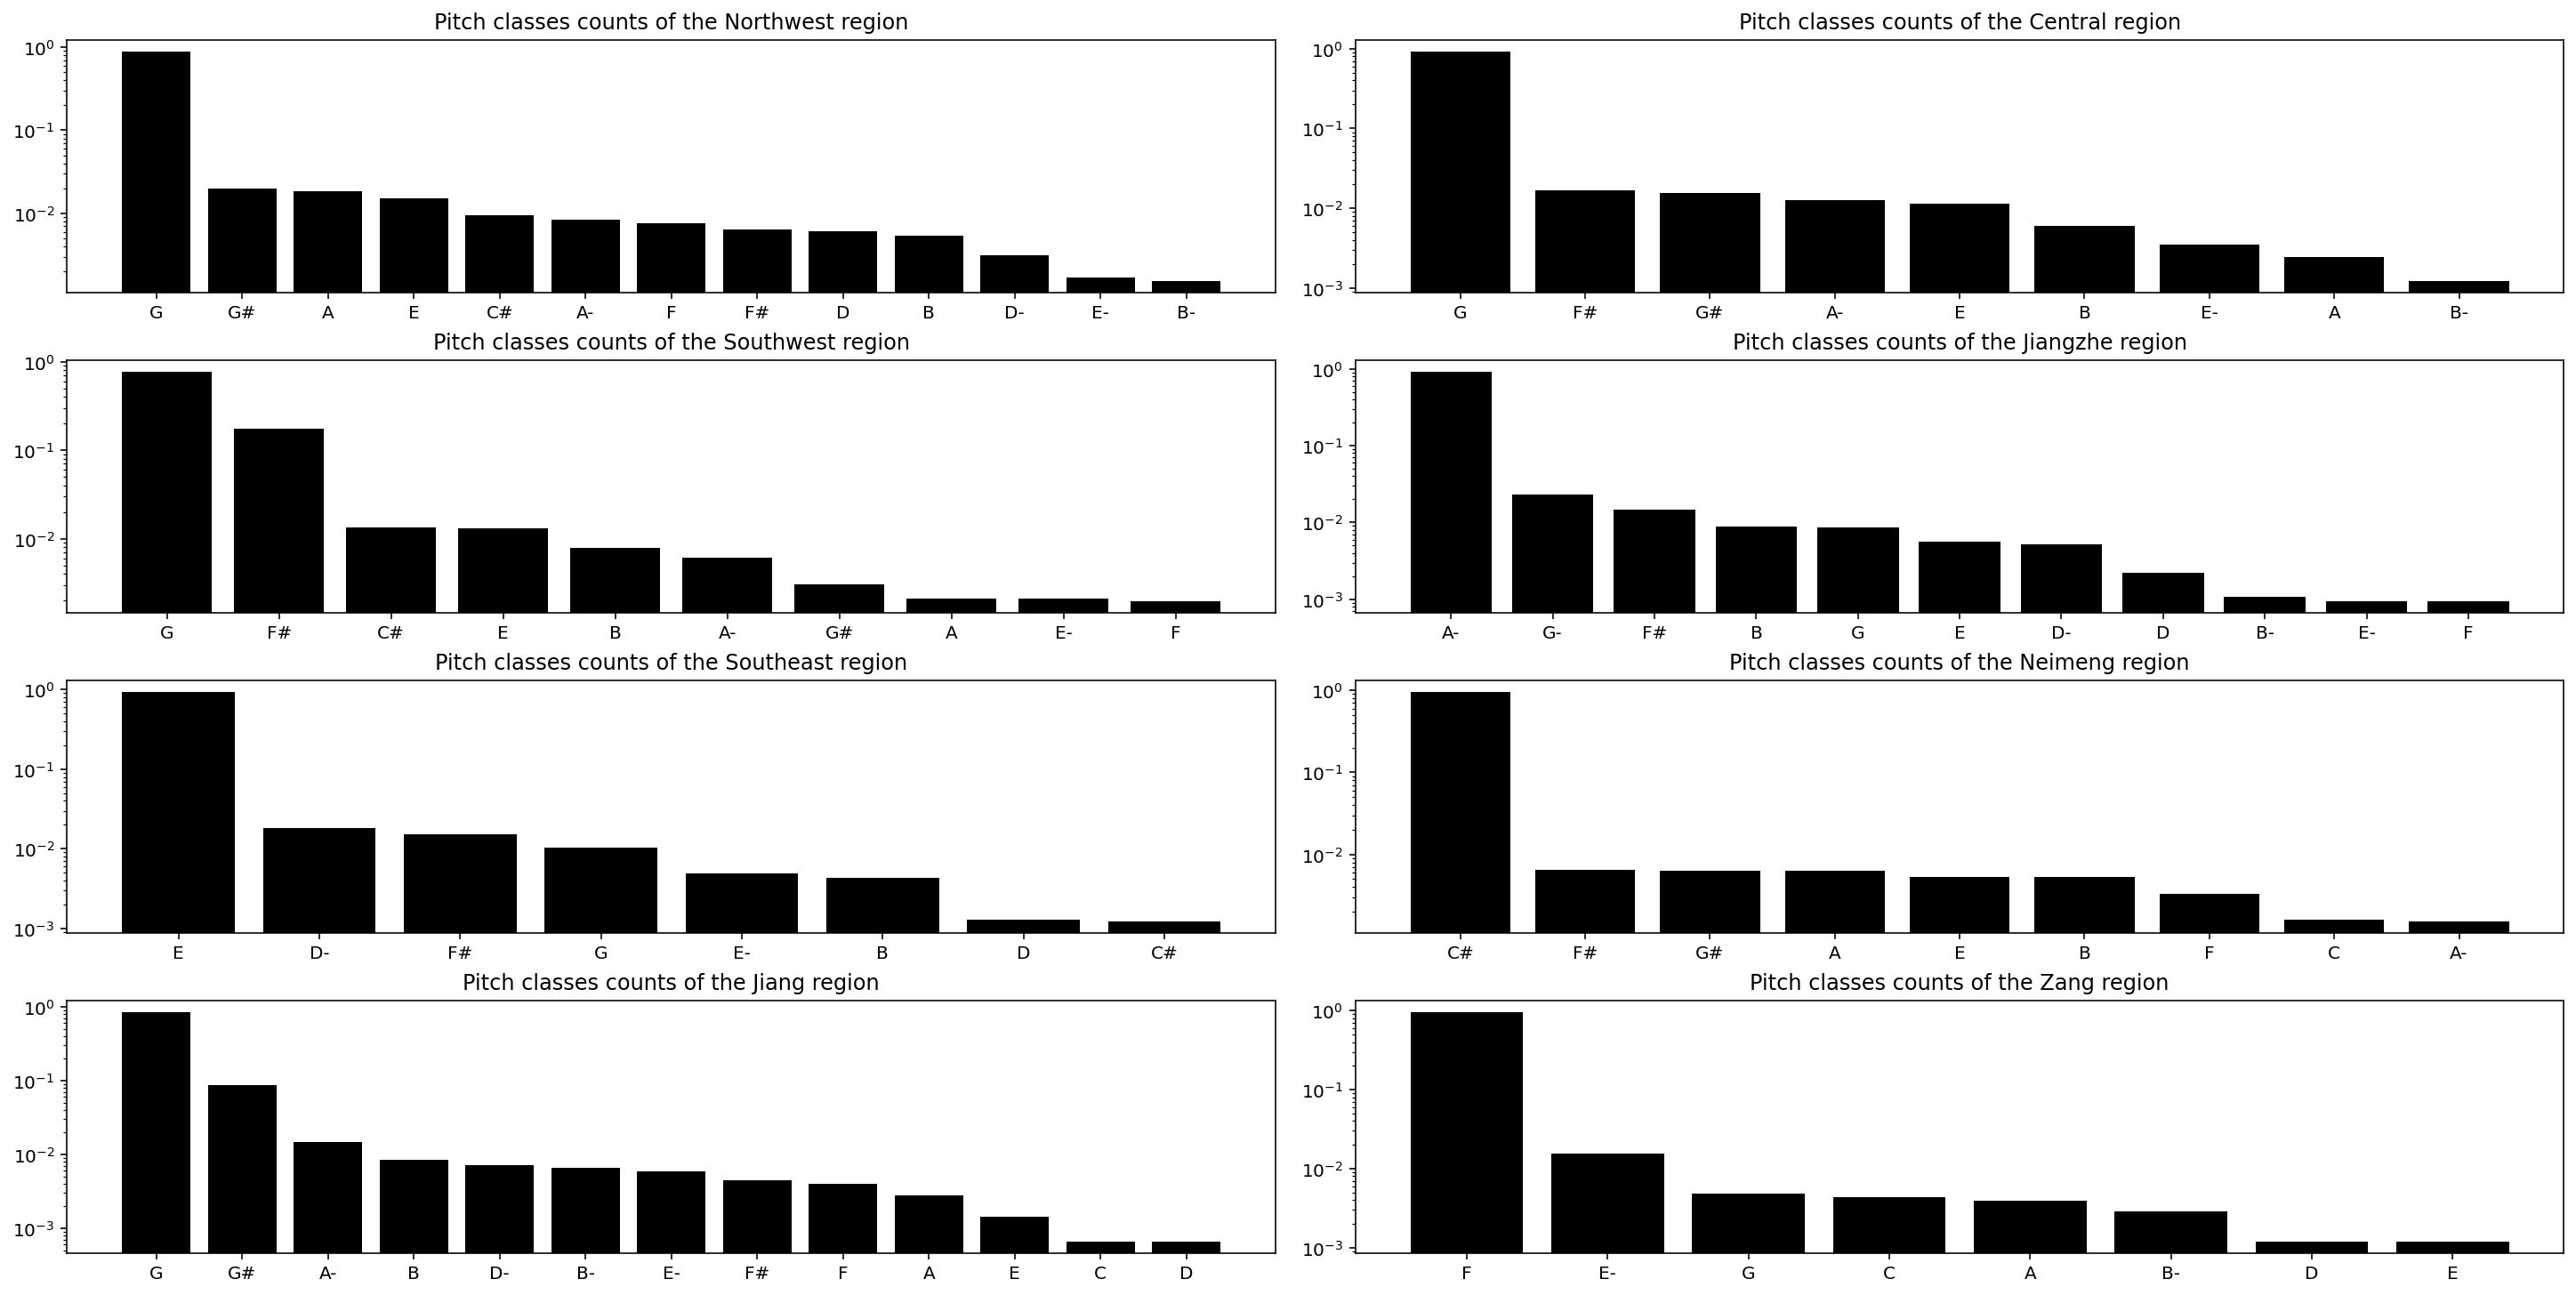

In [26]:
plot_region_stat_counts(region_random_walk, nrows=4, ncols=2, log_y=True, title="Pitch classes counts of the {} region")